<h1>Mass2Motifs of Standard Compounds</h1>

This notebook plots the mass2motifs of standard compounds that can be matched from the MS2LDA data.

In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
basedir = '../MS2LDA/python'
sys.path.append(basedir)

import numpy as np
import pandas as pd
import networkx as nx
import pylab as plt

import matplotlib as mpl
import matplotlib.cm as cm

from IPython.display import display
from lda_for_fragments import Ms2Lda
from visualisation.networkx.lda_visualisation import *

# get rid of annoying warnings
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2>1. Load Data and apply thresholding</h2>

Load an existing Beer3pos project and apply thresholding below.

In [13]:
ms2lda = Ms2Lda.resume_from('projects/Manuscript_Beer3POSmode_EFassigner_ALLextended.project')

Project loaded from projects/Manuscript_Beer3POSmode_EFassigner_ALLextended.project time taken = 24.4807231426
 - input_filenames = 
	../input/manuscript/Beer3pos_MS1filter_Method3_fragments.csv
	../input/manuscript/Beer3pos_MS1filter_Method3_losses.csv
	../input/manuscript/Beer3pos_MS1filter_Method3_ms1.csv
	../input/manuscript/Beer3pos_MS1filter_Method3_ms2.csv
 - df.shape = (1422, 4496)
 - K = 300
 - alpha = 0.166666666667
 - beta = 0.1
 - number of samples stored = 1
 - last_saved_timestamp = 11/30/15 16:11:30
 - message = Beer3Pos analysis for the manuscript with EFassigner EF assignments for ms1, fragments, and losses


In [14]:
ms2lda.do_thresholding(th_doc_topic=0.05, th_topic_word=0.01)

<h2>2. Create network graph</h2>

Load the motifs of interest from an external file

In [15]:
import csv
motif_annotation = {}
motif_idx = {}
i = 0
for item in csv.reader(open("annotations/beer3pos_annotation_Nov2015.csv"), skipinitialspace=True):
    key = int(item[0])
    val = item[1]
    print str(key) + "\t" + val
    motif_annotation[key] = val
    motif_idx[key] = i
    i += 1

motifs_of_interest = motif_annotation.keys()    

# map each motif to the colourmap too
# http://matplotlib.org/1.2.1/mpl_examples/pylab_examples/show_colormaps.hires.png
norm = mpl.colors.Normalize(vmin=min(motif_idx.values()), vmax=max(motif_idx.values()))
cmap = cm.gist_rainbow
motif_colour = cm.ScalarMappable(norm=norm, cmap=cmap)

2	 "Small nitrogen containing fragment ion - often proline or ornithine derived"
260	 "Water loss - indicative of a free hydroxyl group"
262	 "Combined loss of H2O and CO
226	 "Loss of [hexose-H2O] - suggests hexose conjugation (e.g. glucose) substructure"
158	 "Leucine substructure"
243	 "Conjugation of a phosphate group (H4O4P) substructure"
127	 "Conjugation of a phosphate group (H4O4P) substructure"
53	 "Losses indicative of a hexose with NH2 group"
98	 "Fragments possibly indicative for N-Methyl-oxo-pyrrolidinecarboxylic acid like structure"
174	 "Pyroglutamic acid (pyroglutamate) substructure"
59	 "Pyroglutamic acid (pyroglutamate) substructure"
214	 "Amine loss - suggests free NH2 group in fragmented molecule"
60	 "Double water loss - indicative for metabolites containing multiple OH groups and aliphatic chain
151	 "[proline-H2O] suggests conjugated proline substructure"
280	 "Loss possibly indicative of carboxylic acid group with 1-carbon attached"
40	 "Imidazole group linked t

In [16]:
G = get_network_graph(ms2lda, motifs_of_interest)
print "\n" + nx.info(G)

Removed 256 motifs from the graph because they're not in the list
Removed 367 unconnected documents from the graph

Name: 
Type: Graph
Number of nodes: 1099
Number of edges: 1708
Average degree:   3.1083


<h2>3. Standard Peaks</h2>

Now we need to find which MS1 peaks match the list of standards. First, load the standard csv.

In [18]:
mode = 'POS' # either 'POS' or 'NEG'

std_peaks = []
with open("input_files/Standards.csv", "rb") as infile:
   reader = csv.reader(infile)
   next(reader, None)  # skip the headers
   for row in reader:
    stdmix = int(row[0])
    compound_name = row[1]
    formula = row[2]
    polarity = row[3]
    mz = float(row[4])
    rt = float(row[5]) * 60
    mh_intensity = float(row[6])
    tup = (stdmix, compound_name, formula, polarity, mz, rt, mh_intensity)
    if mode == 'POS' and polarity == '+':
        std_peaks.append(tup)
    elif mode == 'NEG' and polarity == '-':
        std_peaks.append(tup)

for tup in std_peaks:
    print tup

(1, '1-Naphthylacetic acid', 'C12H10O2', '+', 187.07535, 249.60000000000002, 54057.0)
(1, 'Serotonin', 'C10H12N2O', '+', 177.10242, 259.20000000000005, 97472.0)
(1, 'Melatonin', 'C13H16N2O2', '+', 233.12831, 276.0, 642246756.0)
(1, 'Phenylhydrazine', 'C6H8N2', '+', 109.07608, 301.8, 5947432.0)
(1, 'Nicotinate', 'C6H5NO2', '+', 124.03932, 412.2, 761863744.0)
(1, 'Pyridoxine', 'C8H11NO3', '+', 170.0811, 435.59999999999997, 1744299213.0)
(1, 'riboflavin', 'C17H20N4O6', '+', 377.14548, 452.4, 9255138.0)
(1, 'Glycerol', 'C3H8O3', '+', 93.05468, 480.0, 2873527.0)
(1, 'Adenine', 'C5H5N5', '+', 136.06174, 491.99999999999994, 167402201.0)
(1, 'Creatinine', 'C4H7N3O', '+', 114.06613, 496.79999999999995, 1055015474.0)
(1, 'L-Phenylalanine', 'C9H11NO2', '+', 166.0862, 499.8, 54983812.0)
(1, 'L-Leucine', 'C6H13NO2', '+', 132.10185, 520.8, 178751219.0)
(1, '4-Aminobenzoate', 'C7H7NO2', '+', 138.05498, 511.2, 21075822.0)
(1, 'Inosine', 'C10H12N4O5', '+', 269.08783, 528.0, 59555340.0)
(1, '2-Phenylgly

Find out the peak ids in our MS1 dataframe that match these standards

In [19]:
import math

mass_tol = 3
rt_tol = 12

std = np.array(std_peaks)
std_mz = np.array([x[4] for x in std_peaks])
std_rt = np.array([x[5] for x in std_peaks])
matches = {}

ms1_label = {}
for row in ms2lda.ms1.itertuples(index=True):
    peakid = row[1]
    mz = row[5]
    rt = row[4]

    # the following line is hacky for pos mode data
    mass_delta = mz*mass_tol*1e-6
    mass_start = mz-mass_delta
    mass_end = mz+mass_delta
    rt_start = rt-rt_tol
    rt_end = rt+rt_tol

    match_mass = (std_mz>mass_start) & (std_mz<mass_end)
    match_rt = (std_rt>rt_start) & (std_rt<rt_end)
    match = match_mass & match_rt

    res = std[match]
    if len(res) == 1:
        closest = tuple(res[0])
        matches[closest] = row
        ms1_label[row[1]] = closest[1]        
    elif len(res)>1:
        closest = None
        min_dist = sys.maxint
        for match_res in res:
            match_mz = float(match_res[4])
            match_rt = float(match_res[5])
            dist = math.sqrt((match_rt-rt)**2 + (match_mz-mz)**2)
            if dist < min_dist:
                min_dist = dist
                closest = match_res
        closest = tuple(closest)
        matches[closest] = row
        ms1_label[row[1]] = closest[1]

print "Matches found %d/%d" % (len(matches), len(std))
print

ms1_list = []
for match in matches:
    key = str(match)
    ms1_row = matches[match]
    value = str(ms1_row)
    pid = ms1_row[1]
    ms1_list.append(pid)

Matches found 45/117



Print the annotated Mass2Motifs of the fragmentation spectra of matched standard compounds

 - M2M_131	:  "fragments from [hexose-H2O] substructure (a hexose conjugation
		  fragment_85.02832 (0.566),fragment_69.03368 (0.105),fragment_97.02839 (0.088),fragment_61.02854 (0.070),fragment_57.0337 (0.045),fragment_91.03925 (0.022),fragment_127.03868 (0.021),fragment_73.0285 (0.019),fragment_55.01824 (0.019),



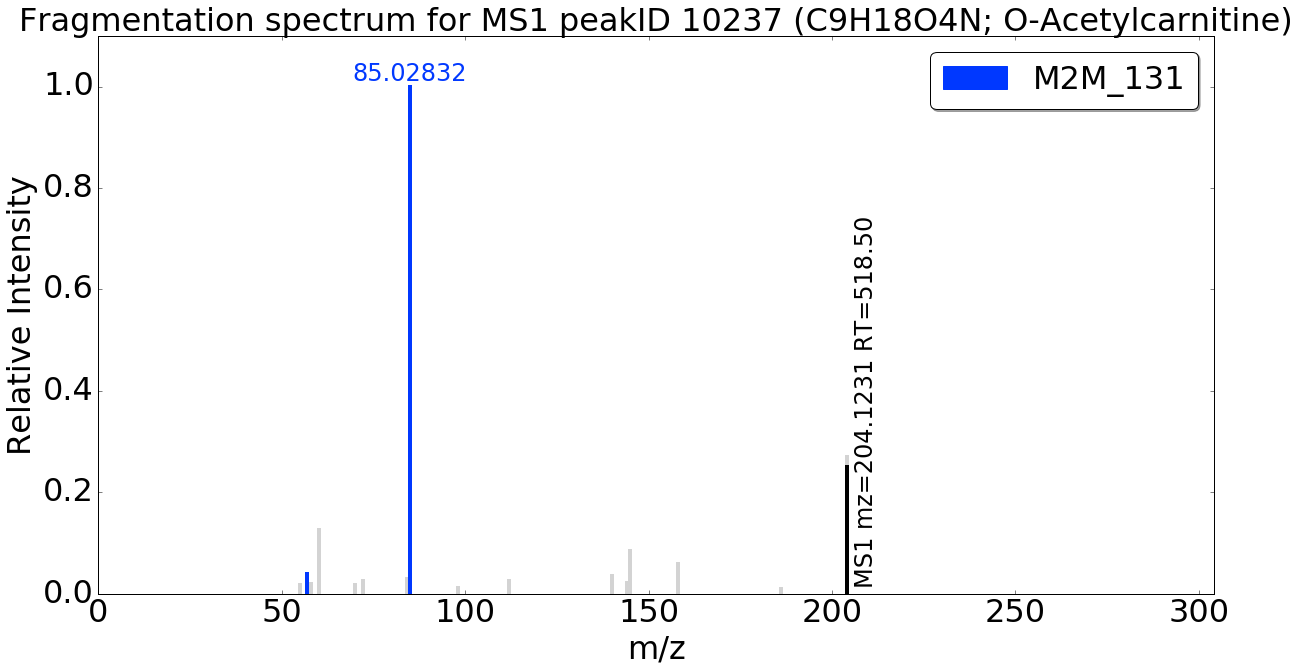

 - M2M_262	:  "Combined loss of H2O and CO
		  loss_46.00539 (0.854),loss_74.0003 (0.058),loss_47.0087 (0.017),fragment_100.11239 (0.016),



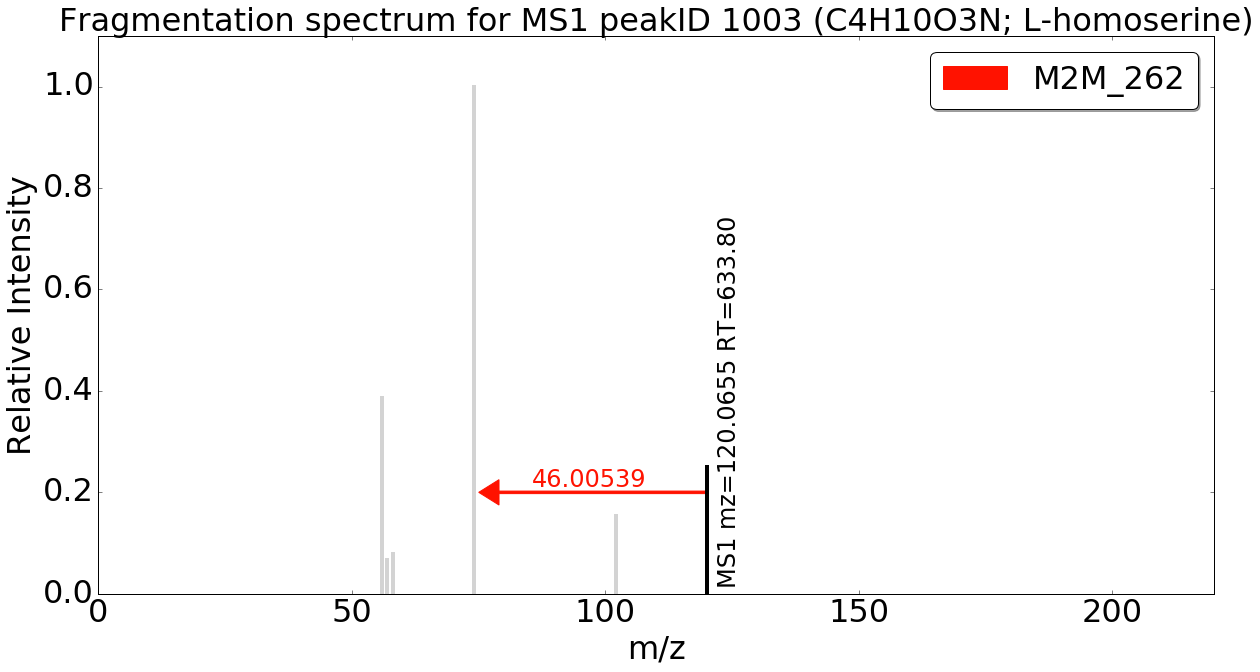

 - M2M_174	:  "Pyroglutamic acid (pyroglutamate) substructure"
		  fragment_84.0442 (0.854),fragment_56.04977 (0.102),
 - M2M_262	:  "Combined loss of H2O and CO
		  loss_46.00539 (0.854),loss_74.0003 (0.058),loss_47.0087 (0.017),fragment_100.11239 (0.016),



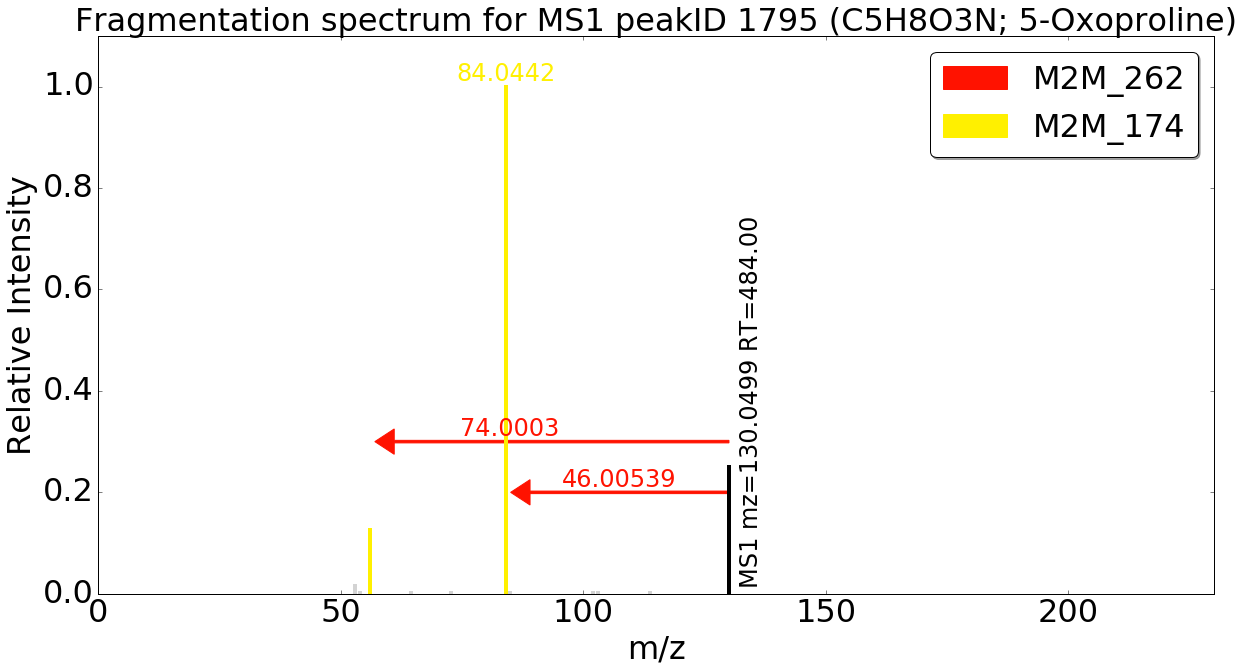

 - M2M_174	:  "Pyroglutamic acid (pyroglutamate) substructure"
		  fragment_84.0442 (0.854),fragment_56.04977 (0.102),



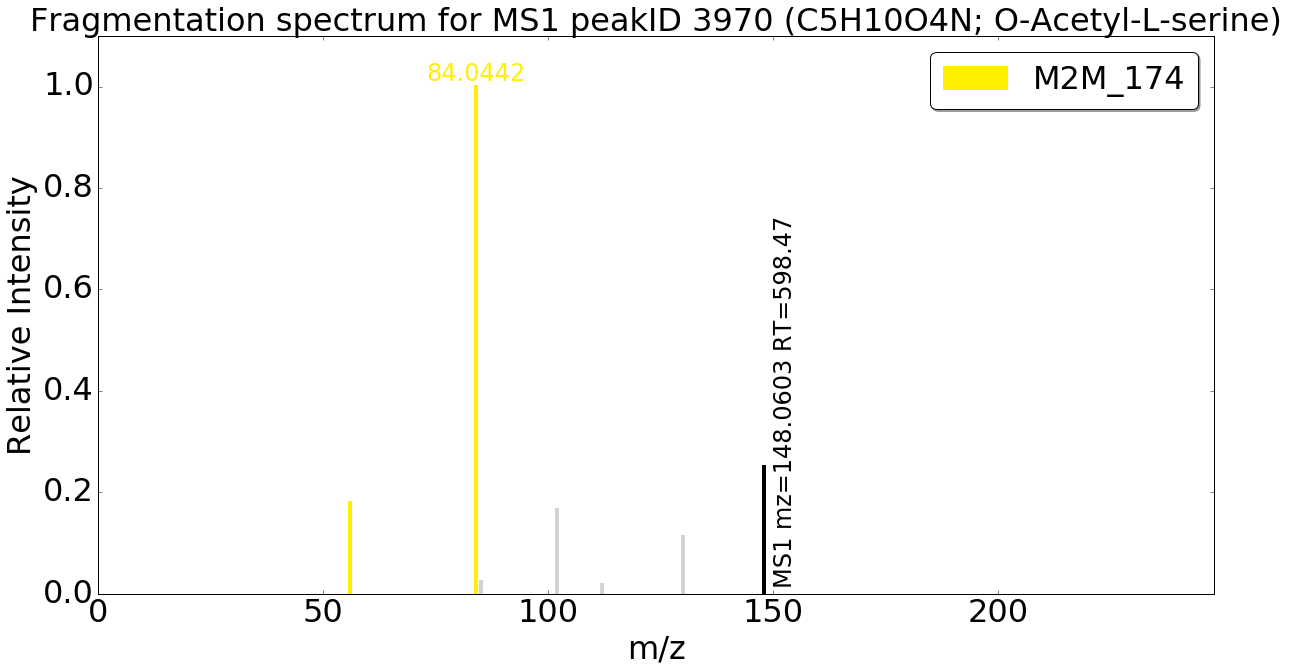

 - M2M_260	:  "Water loss - indicative of a free hydroxyl group"
		  loss_18.00923 (0.942),fragment_176.09136 (0.015),
 - M2M_60	:  "Double water loss - indicative for metabolites containing multiple OH groups and aliphatic chain
		  loss_36.01851 (0.913),



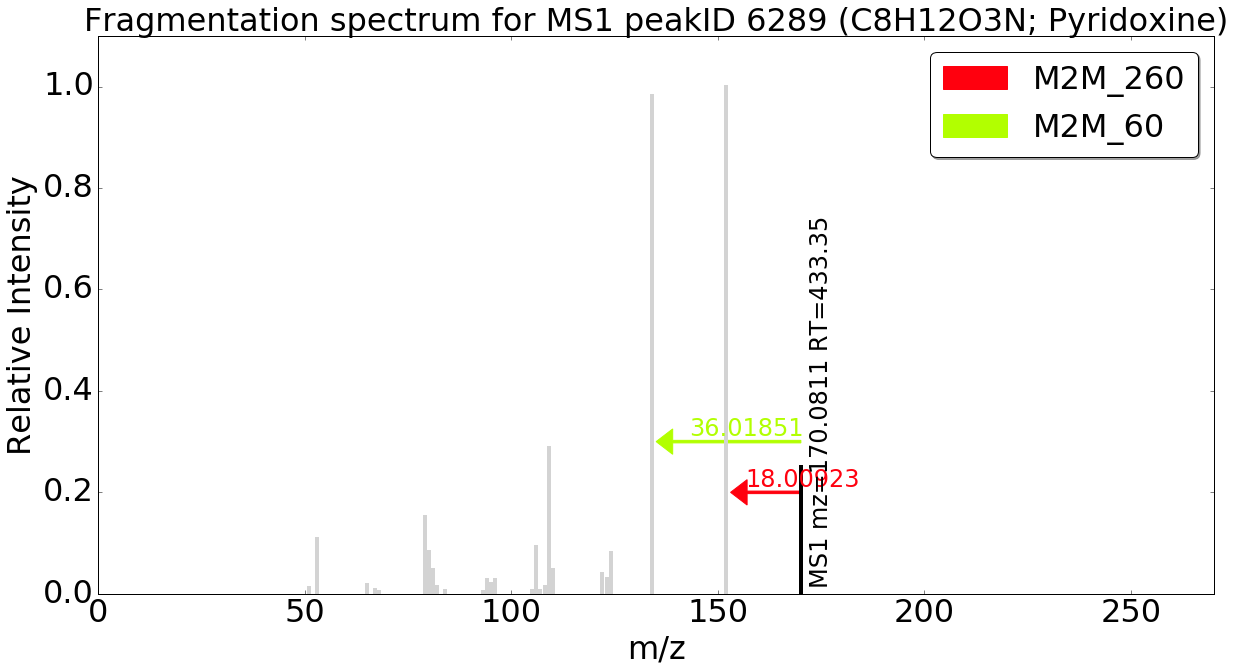

 - M2M_40	:  "Imidazole group linked to a carboxylgroup through one CH2 group substructure"
		  fragment_83.06041 (0.433),fragment_129.06581 (0.130),fragment_56.04977 (0.073),fragment_230.15978 (0.045),loss_132.09749 (0.022),fragment_257.12534 (0.012),
 - M2M_262	:  "Combined loss of H2O and CO
		  loss_46.00539 (0.854),loss_74.0003 (0.058),loss_47.0087 (0.017),fragment_100.11239 (0.016),



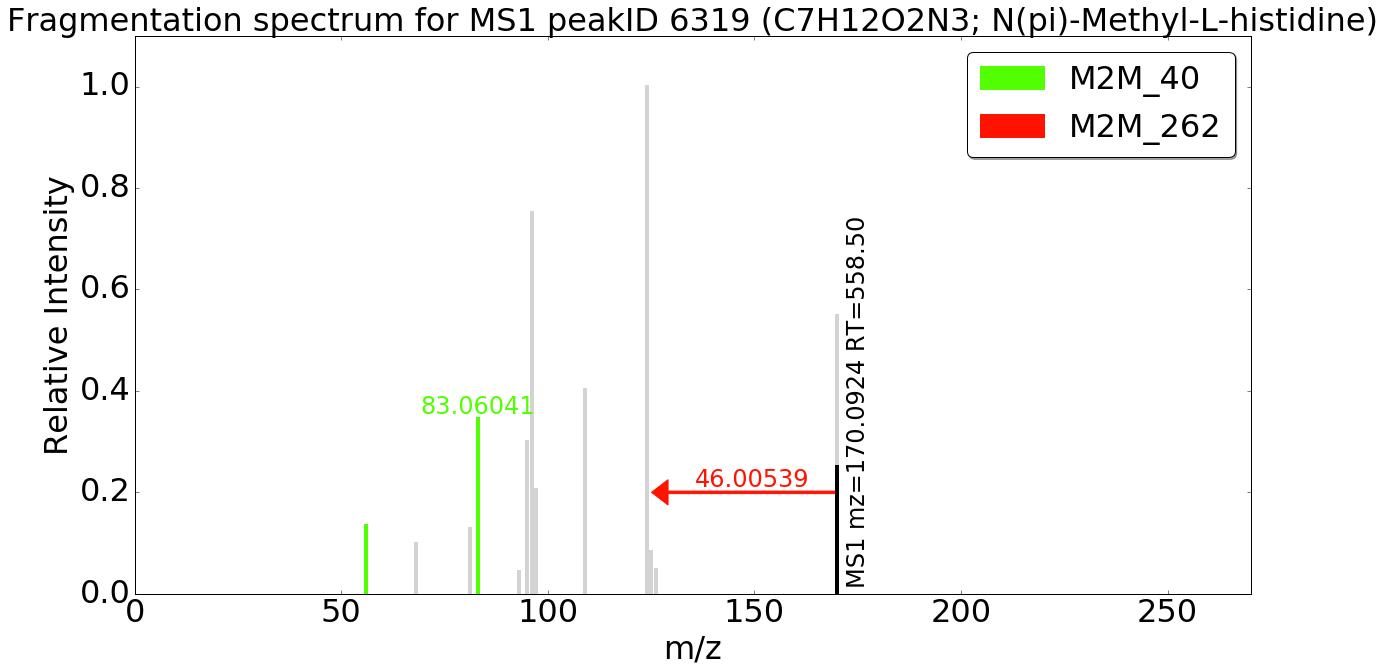

 - No M2M for this MS1 peak at the specified thresholding levels

 - M2M_131	:  "fragments from [hexose-H2O] substructure (a hexose conjugation
		  fragment_85.02832 (0.566),fragment_69.03368 (0.105),fragment_97.02839 (0.088),fragment_61.02854 (0.070),fragment_57.0337 (0.045),fragment_91.03925 (0.022),fragment_127.03868 (0.021),fragment_73.0285 (0.019),fragment_55.01824 (0.019),



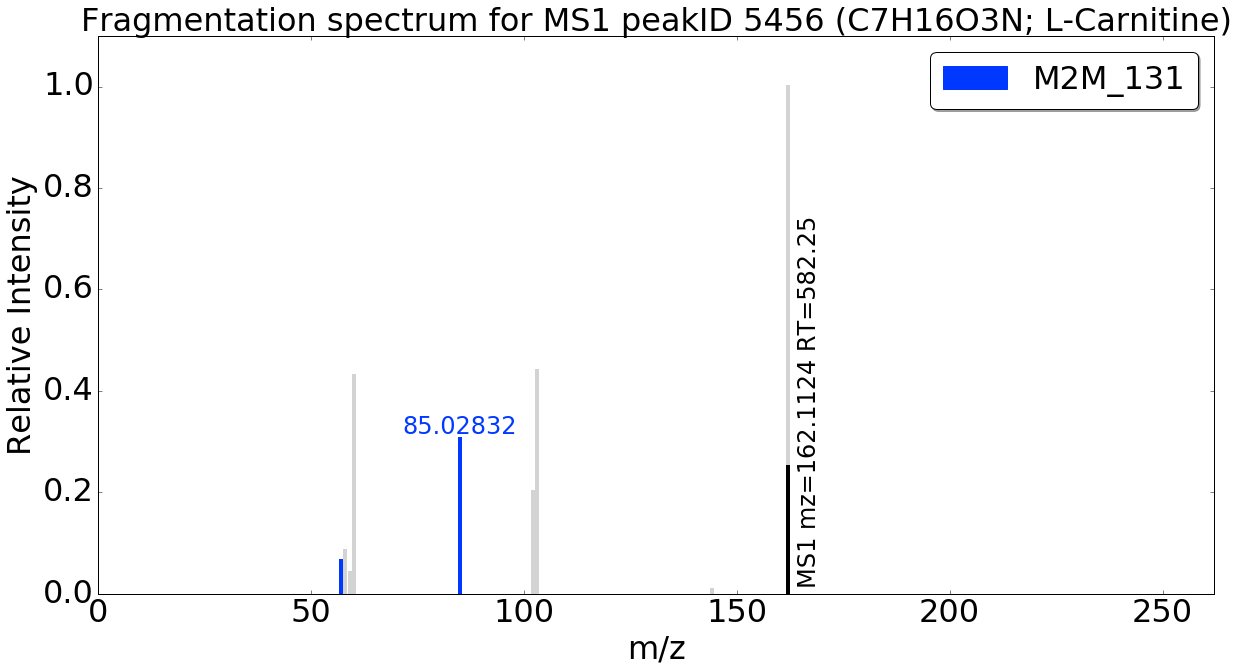

 - M2M_115	:  "[phenylalanine-COOH] substructure"
		  fragment_120.0804 (0.513),fragment_103.05448 (0.153),fragment_166.08631 (0.070),loss_45.99208 (0.048),fragment_93.06981 (0.020),fragment_91.05413 (0.020),fragment_53.03888 (0.018),
 - M2M_262	:  "Combined loss of H2O and CO
		  loss_46.00539 (0.854),loss_74.0003 (0.058),loss_47.0087 (0.017),fragment_100.11239 (0.016),



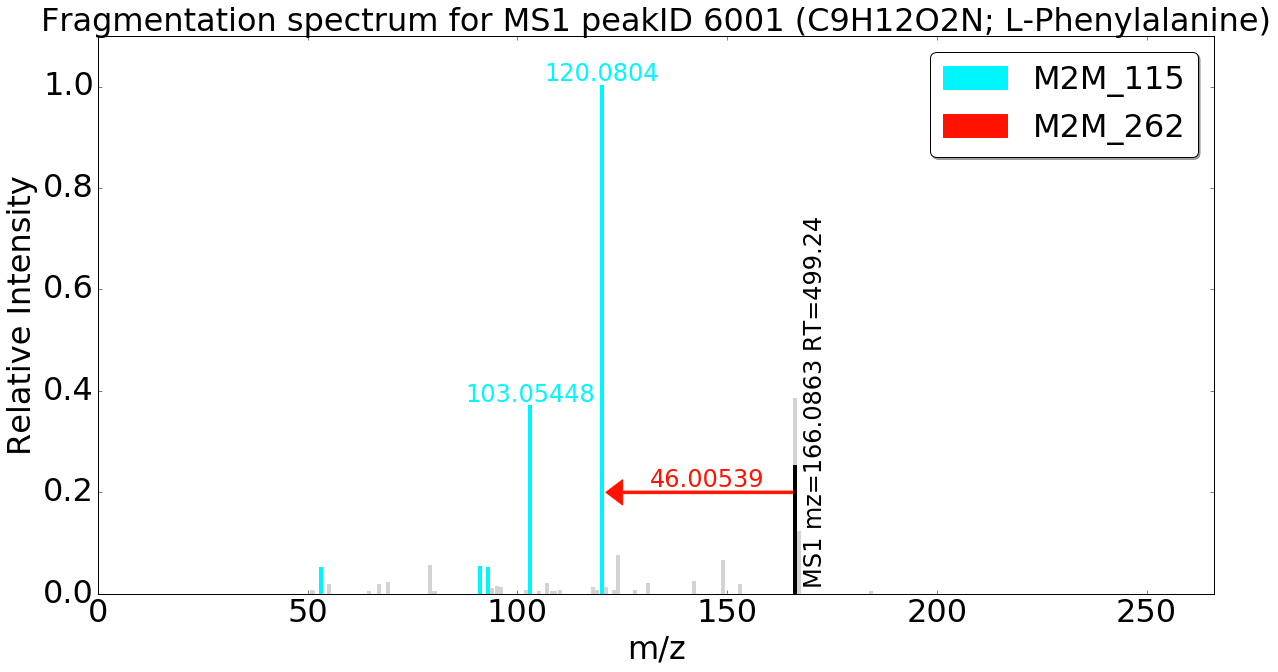

 - M2M_45	:  "Pipecolic acid (pipecolate) substructure"
		  fragment_84.08071 (0.757),fragment_56.04977 (0.059),fragment_130.08587 (0.059),loss_91.06316 (0.022),fragment_67.05454 (0.015),



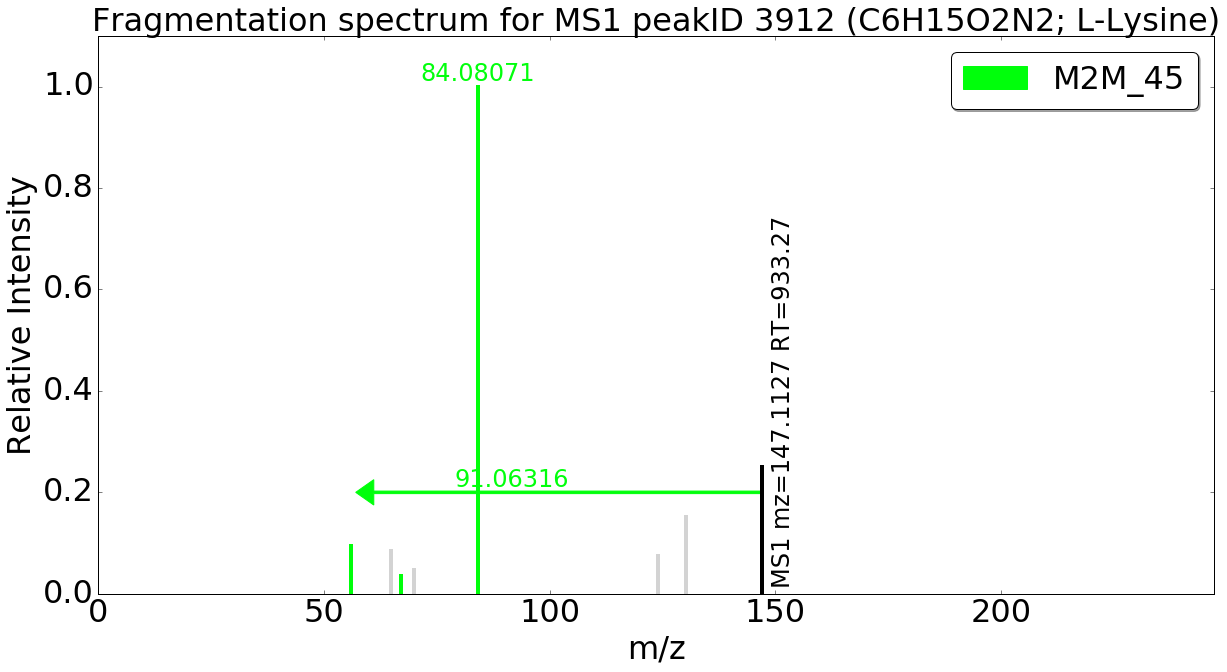

 - M2M_280	:  "Loss possibly indicative of carboxylic acid group with 1-carbon attached"
		  loss_60.02094 (0.741),loss_106.02643 (0.053),fragment_158.11806 (0.052),
 - M2M_42	:  "Asparagine substructure"
		  fragment_74.02353 (0.251),fragment_88.03919 (0.220),fragment_87.05542 (0.078),fragment_133.06148 (0.077),fragment_70.02895 (0.038),fragment_158.04483 (0.034),fragment_60.04477 (0.020),fragment_116.0344 (0.019),loss_101.04757 (0.016),fragment_175.12257 (0.015),loss_188.07979 (0.012),fragment_88.0218 (0.010),
 - M2M_262	:  "Combined loss of H2O and CO
		  loss_46.00539 (0.854),loss_74.0003 (0.058),loss_47.0087 (0.017),fragment_100.11239 (0.016),



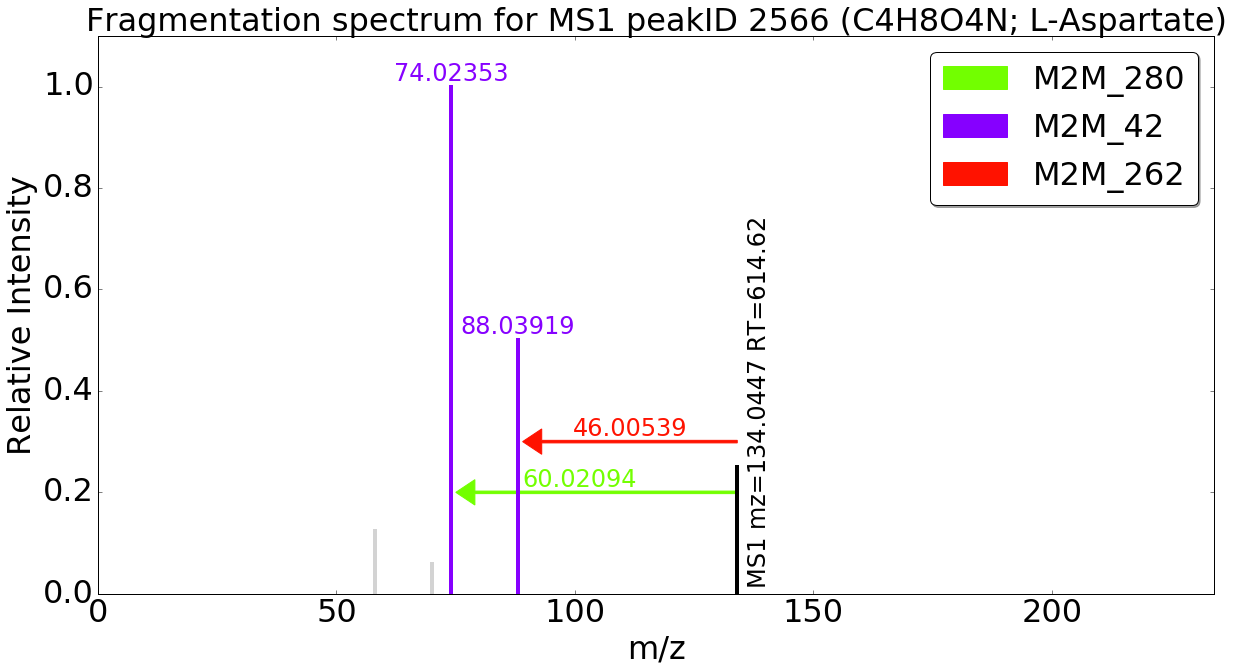

 - M2M_260	:  "Water loss - indicative of a free hydroxyl group"
		  loss_18.00923 (0.942),fragment_176.09136 (0.015),



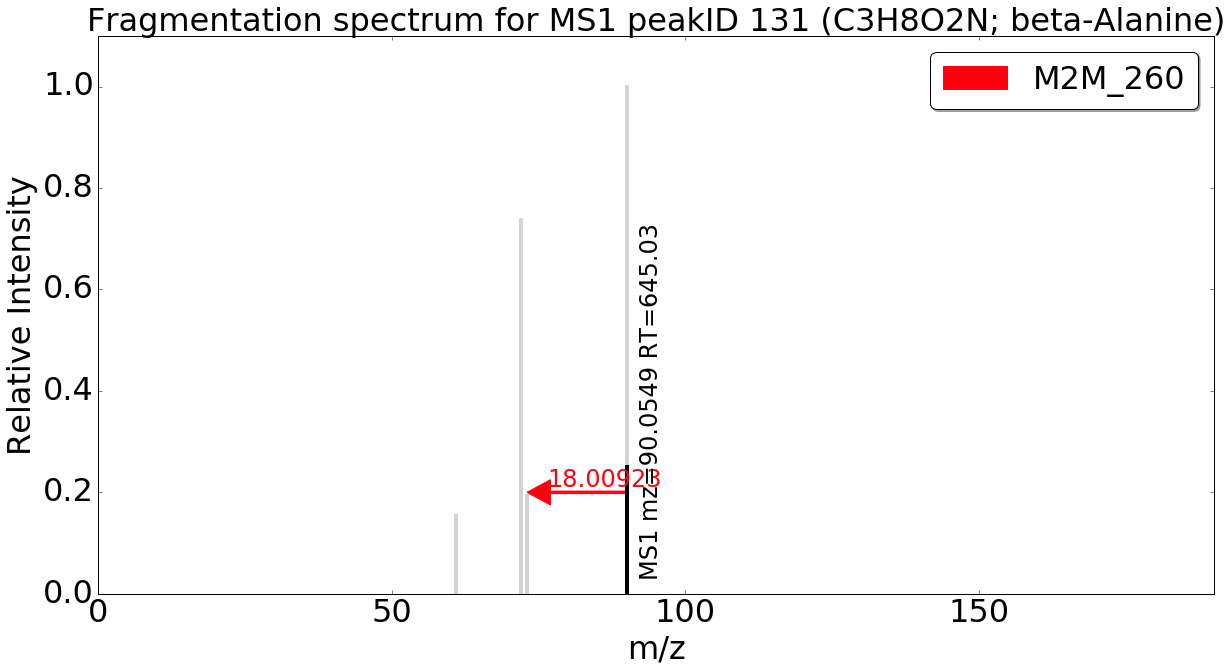

 - M2M_162	:  "Guanine substructure"
		  fragment_152.05609 (0.327),fragment_153.04074 (0.126),loss_115.06303 (0.067),loss_151.04878 (0.045),fragment_110.03458 (0.040),fragment_135.02953 (0.036),loss_116.06671 (0.031),loss_197.05414 (0.020),fragment_128.04551 (0.020),fragment_314.11224 (0.016),loss_114.07908 (0.016),
 - M2M_214	:  "Amine loss - suggests free NH2 group in fragmented molecule"
		  loss_17.02527 (0.883),fragment_366.10831 (0.021),



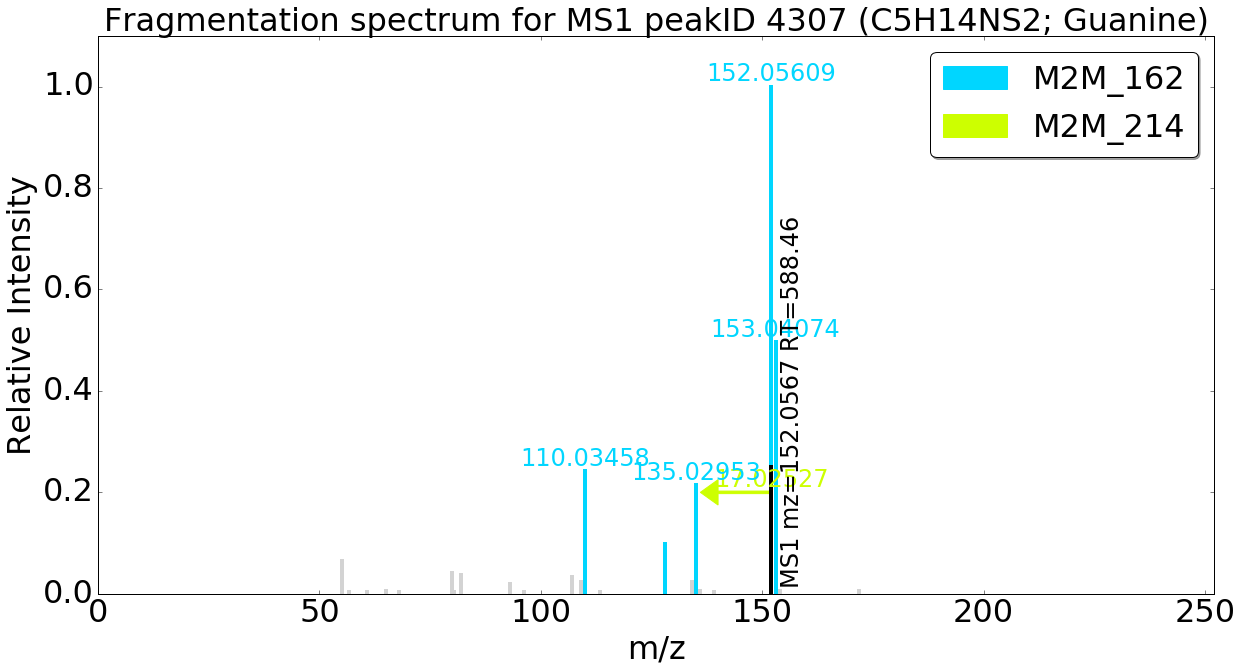

 - M2M_2	:  "Small nitrogen containing fragment ion - often proline or ornithine derived"
		  fragment_70.06514 (0.979),
 - M2M_151	:  "[proline-H2O] suggests conjugated proline substructure"
		  fragment_116.07116 (0.473),loss_143.05783 (0.166),loss_161.06841 (0.128),loss_115.06303 (0.101),



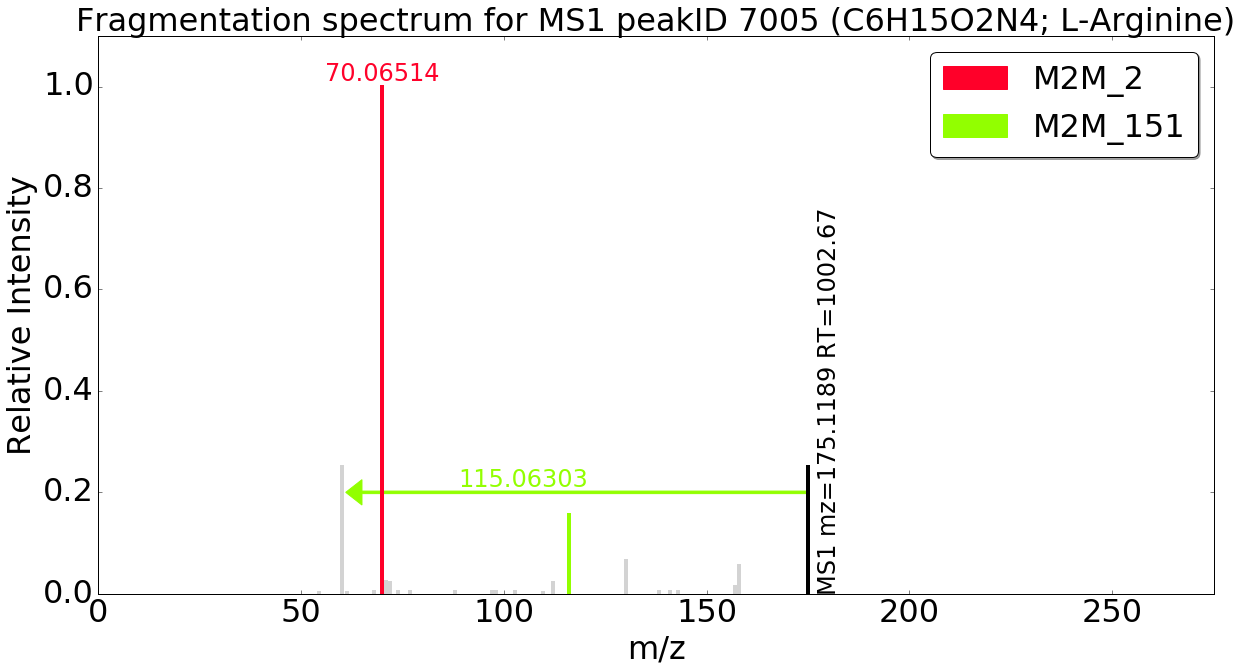

 - M2M_202	:  "Tryptophan related substructure"
		  fragment_118.06544 (0.155),fragment_146.05935 (0.129),fragment_188.07061 (0.106),fragment_130.06468 (0.061),fragment_91.05413 (0.049),fragment_146.06086 (0.046),fragment_115.05435 (0.045),fragment_144.08061 (0.034),fragment_143.07379 (0.033),fragment_117.05719 (0.032),fragment_261.09335 (0.027),fragment_170.06037 (0.026),fragment_132.08143 (0.023),fragment_128.04963 (0.018),fragment_142.06476 (0.014),
 - M2M_211	:  "N-acetylputrescine substructure"
		  loss_59.037 (0.567),fragment_114.09123 (0.097),loss_101.04757 (0.042),loss_59.00065 (0.030),fragment_131.11777 (0.029),fragment_425.1355 (0.029),fragment_72.04466 (0.023),fragment_60.04477 (0.014),
 - M2M_214	:  "Amine loss - suggests free NH2 group in fragmented molecule"
		  loss_17.02527 (0.883),fragment_366.10831 (0.021),



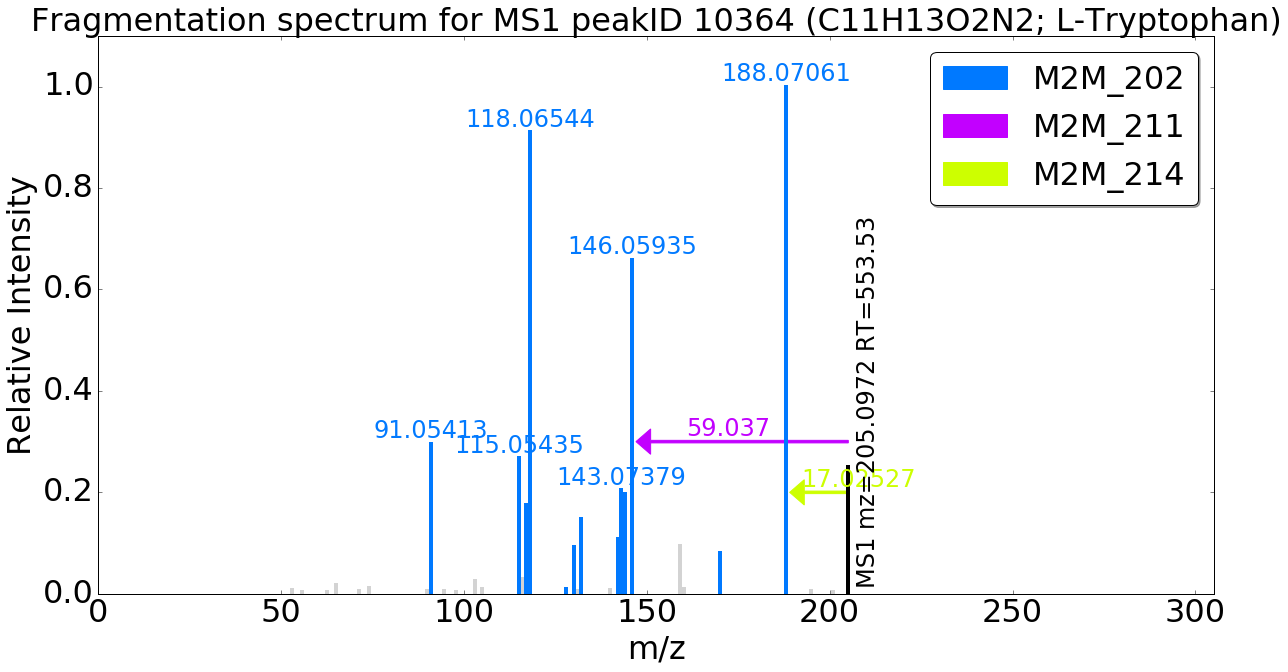

 - M2M_162	:  "Guanine substructure"
		  fragment_152.05609 (0.327),fragment_153.04074 (0.126),loss_115.06303 (0.067),loss_151.04878 (0.045),fragment_110.03458 (0.040),fragment_135.02953 (0.036),loss_116.06671 (0.031),loss_197.05414 (0.020),fragment_128.04551 (0.020),fragment_314.11224 (0.016),loss_114.07908 (0.016),
 - M2M_156	:  "[Pentose-H2O] loss
		  loss_132.04207 (0.683),loss_160.03691 (0.038),loss_149.06869 (0.037),fragment_102.06629 (0.030),loss_131.05794 (0.018),fragment_74.07118 (0.011),



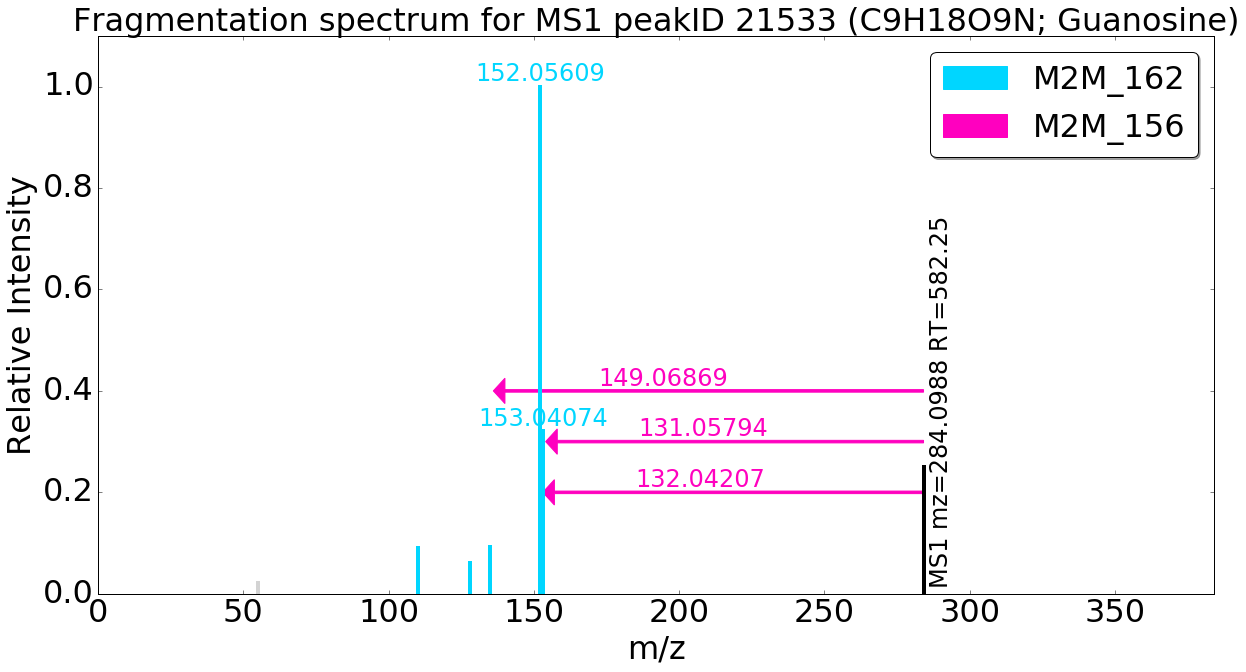

 - No M2M for this MS1 peak at the specified thresholding levels

 - M2M_174	:  "Pyroglutamic acid (pyroglutamate) substructure"
		  fragment_84.0442 (0.854),fragment_56.04977 (0.102),
 - M2M_214	:  "Amine loss - suggests free NH2 group in fragmented molecule"
		  loss_17.02527 (0.883),fragment_366.10831 (0.021),



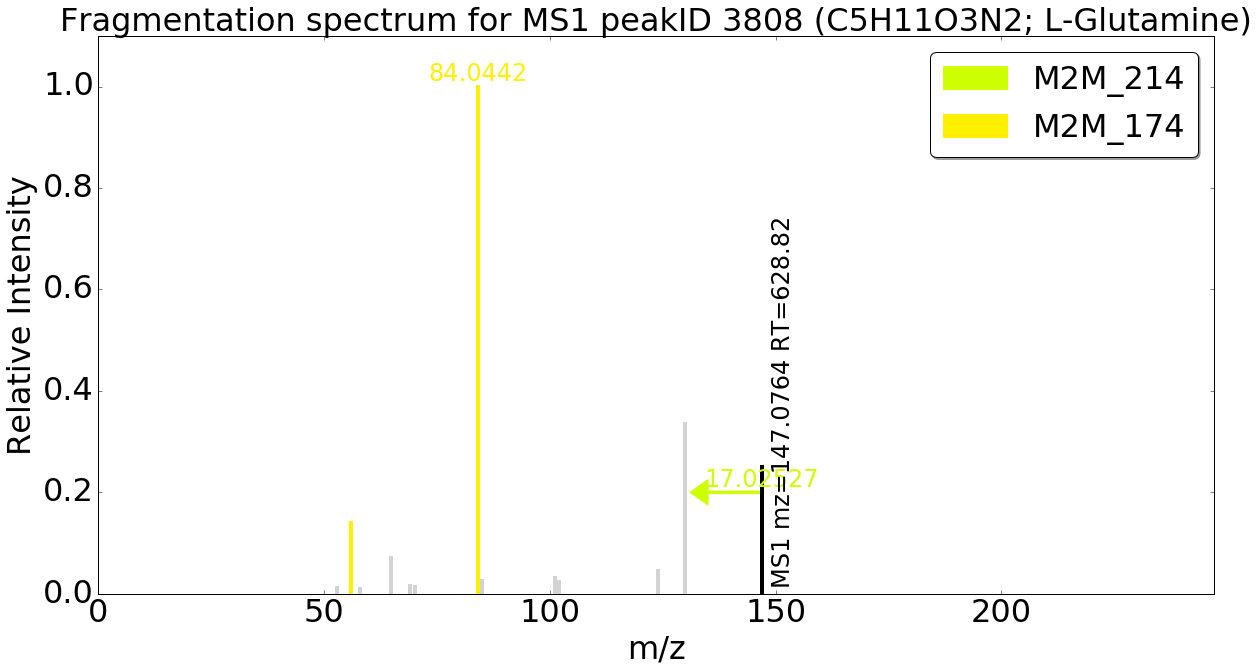

 - M2M_2	:  "Small nitrogen containing fragment ion - often proline or ornithine derived"
		  fragment_70.06514 (0.979),
 - M2M_214	:  "Amine loss - suggests free NH2 group in fragmented molecule"
		  loss_17.02527 (0.883),fragment_366.10831 (0.021),
 - M2M_151	:  "[proline-H2O] suggests conjugated proline substructure"
		  fragment_116.07116 (0.473),loss_143.05783 (0.166),loss_161.06841 (0.128),loss_115.06303 (0.101),



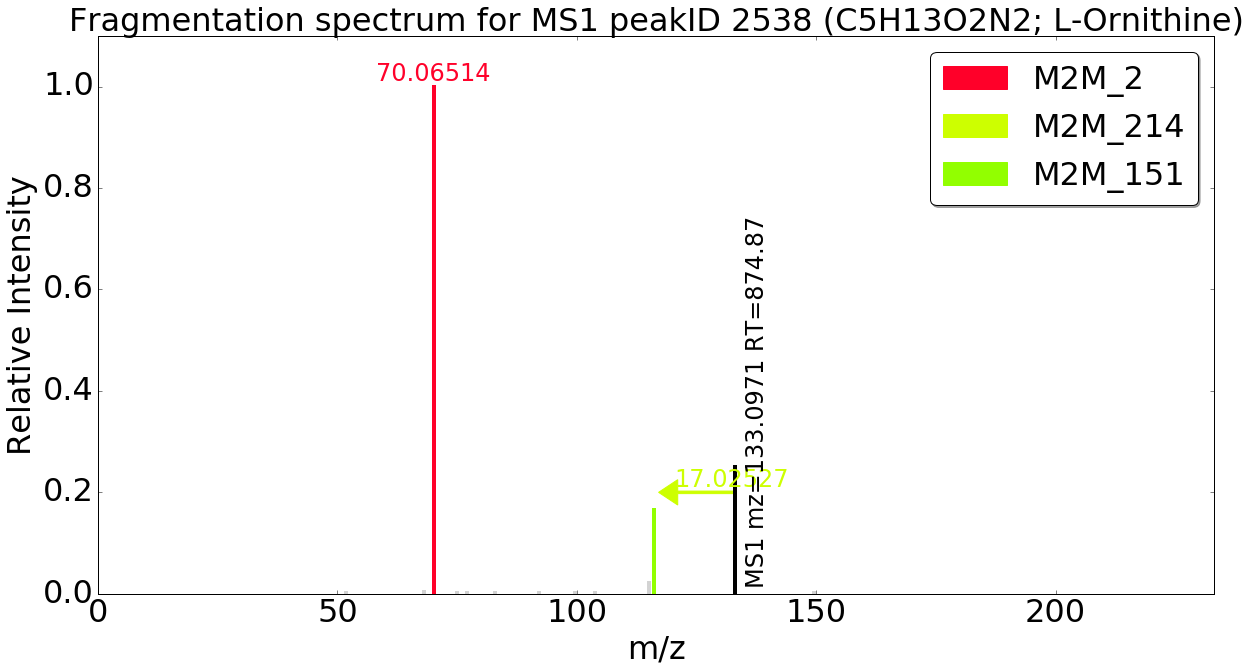

 - M2M_158	:  "Leucine substructure"
		  fragment_86.09652 (0.794),fragment_132.10154 (0.048),fragment_219.90121 (0.031),fragment_293.3515 (0.031),fragment_189.12428 (0.012),
 - M2M_262	:  "Combined loss of H2O and CO
		  loss_46.00539 (0.854),loss_74.0003 (0.058),loss_47.0087 (0.017),fragment_100.11239 (0.016),



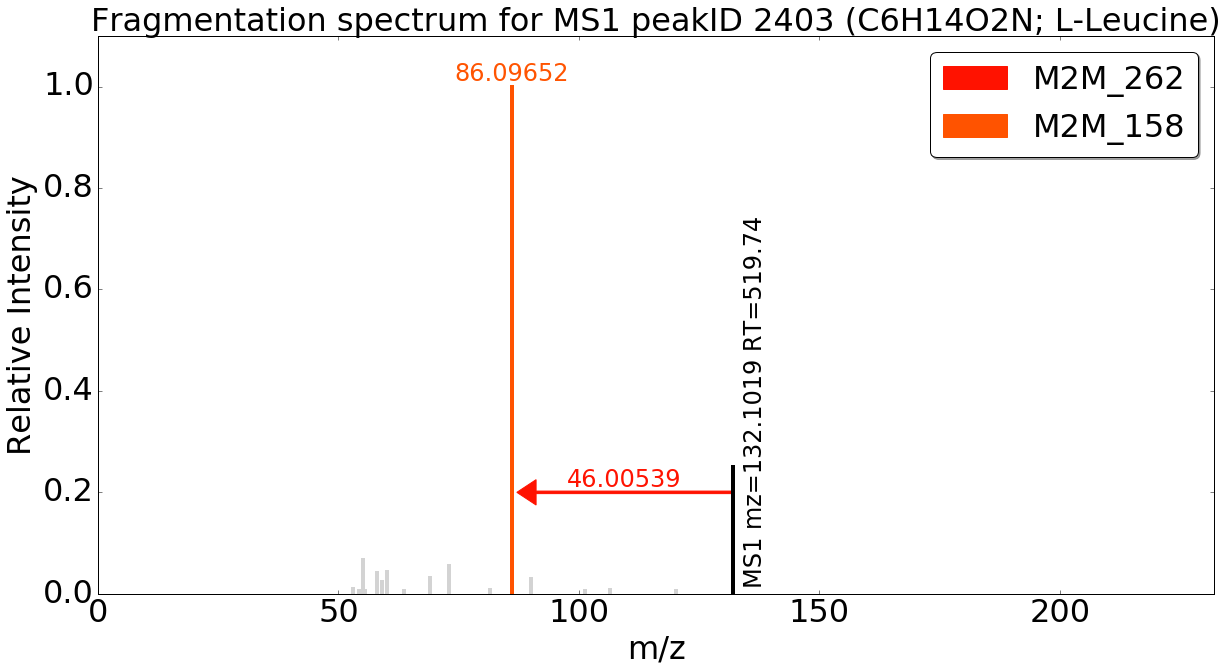

 - No M2M for this MS1 peak at the specified thresholding levels

 - M2M_184	:  "Trimethylated amine connected to a carboxylic acid group substructure (e.g. betaine)"
		  fragment_58.06552 (0.377),fragment_119.08937 (0.158),fragment_59.07323 (0.093),fragment_120.09034 (0.067),fragment_59.06877 (0.035),fragment_173.04168 (0.034),fragment_60.07657 (0.024),loss_59.01322 (0.021),fragment_76.07561 (0.011),



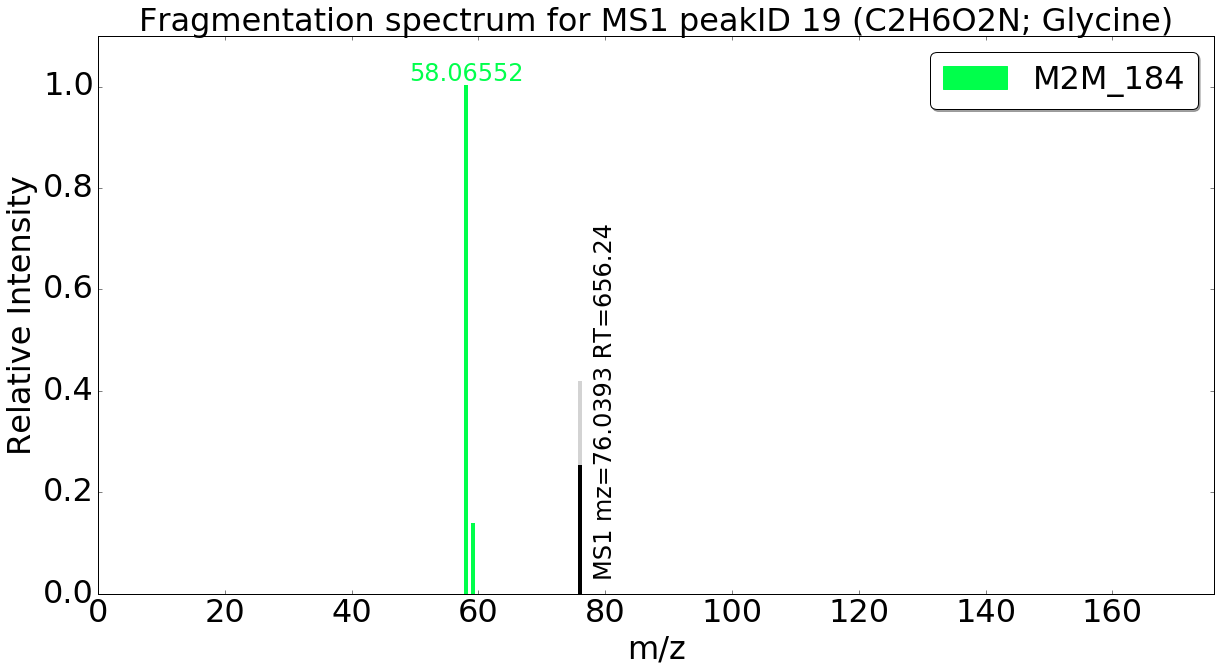

 - M2M_17	:  "Tyrosine substructure"
		  fragment_136.07599 (0.256),fragment_182.08217 (0.092),fragment_123.04467 (0.058),fragment_165.05388 (0.050),fragment_160.90206 (0.048),fragment_119.04874 (0.042),fragment_102.0547 (0.032),fragment_95.04936 (0.026),fragment_247.1084 (0.022),fragment_161.0686 (0.019),fragment_119.04991 (0.018),fragment_165.05578 (0.017),fragment_154.08575 (0.017),loss_170.06884 (0.016),
 - M2M_91	:  "Aromatic substructure
		  fragment_108.04425 (0.249),fragment_80.04949 (0.111),fragment_53.03888 (0.099),fragment_126.05563 (0.090),loss_55.00558 (0.051),loss_58.00534 (0.042),fragment_55.01824 (0.028),loss_41.02668 (0.026),loss_60.04021 (0.026),loss_23.01523 (0.024),fragment_75.02734 (0.023),fragment_68.01311 (0.016),loss_86.00034 (0.015),loss_40.03137 (0.014),loss_101.01104 (0.013),fragment_88.05865 (0.011),



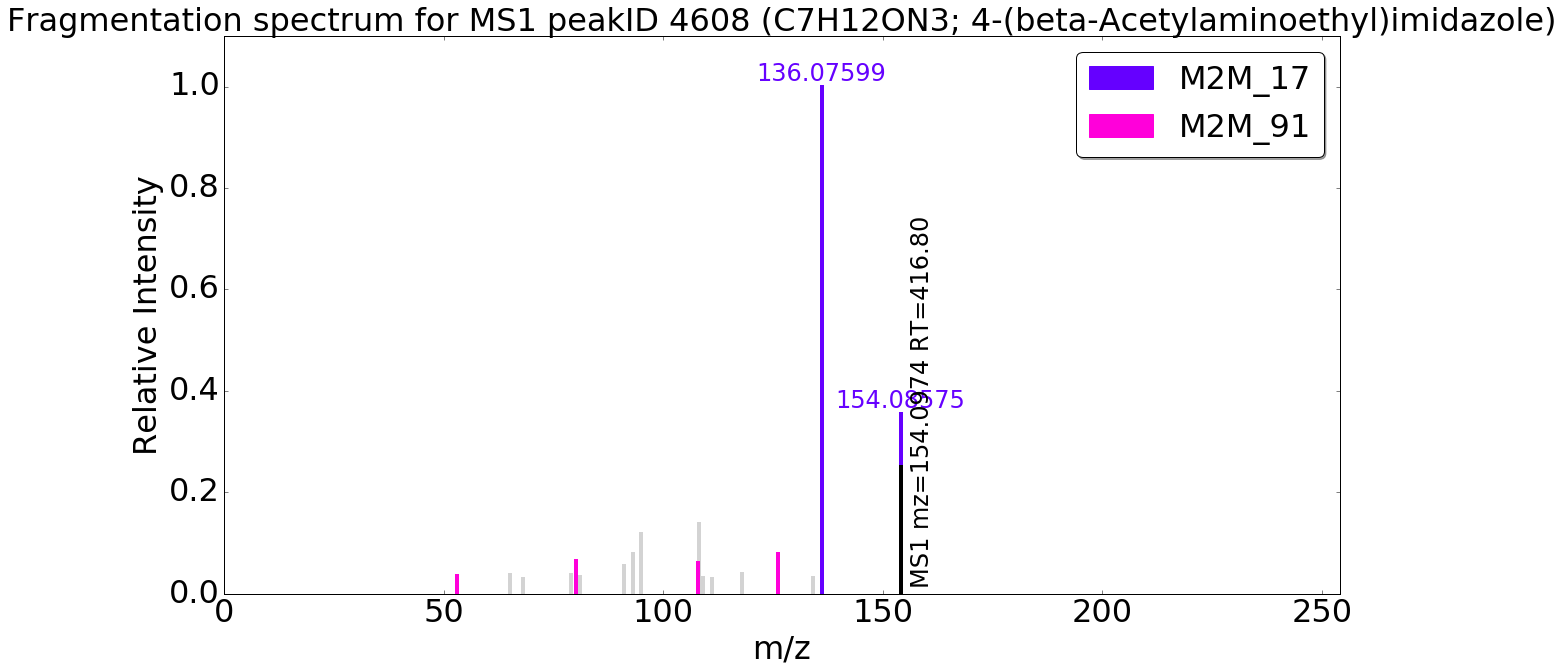

 - M2M_220	:  "Adenine substructure"
		  fragment_136.06239 (0.688),loss_162.03528 (0.049),fragment_119.03518 (0.039),loss_153.04184 (0.027),fragment_137.04626 (0.020),
 - M2M_156	:  "[Pentose-H2O] loss
		  loss_132.04207 (0.683),loss_160.03691 (0.038),loss_149.06869 (0.037),fragment_102.06629 (0.030),loss_131.05794 (0.018),fragment_74.07118 (0.011),



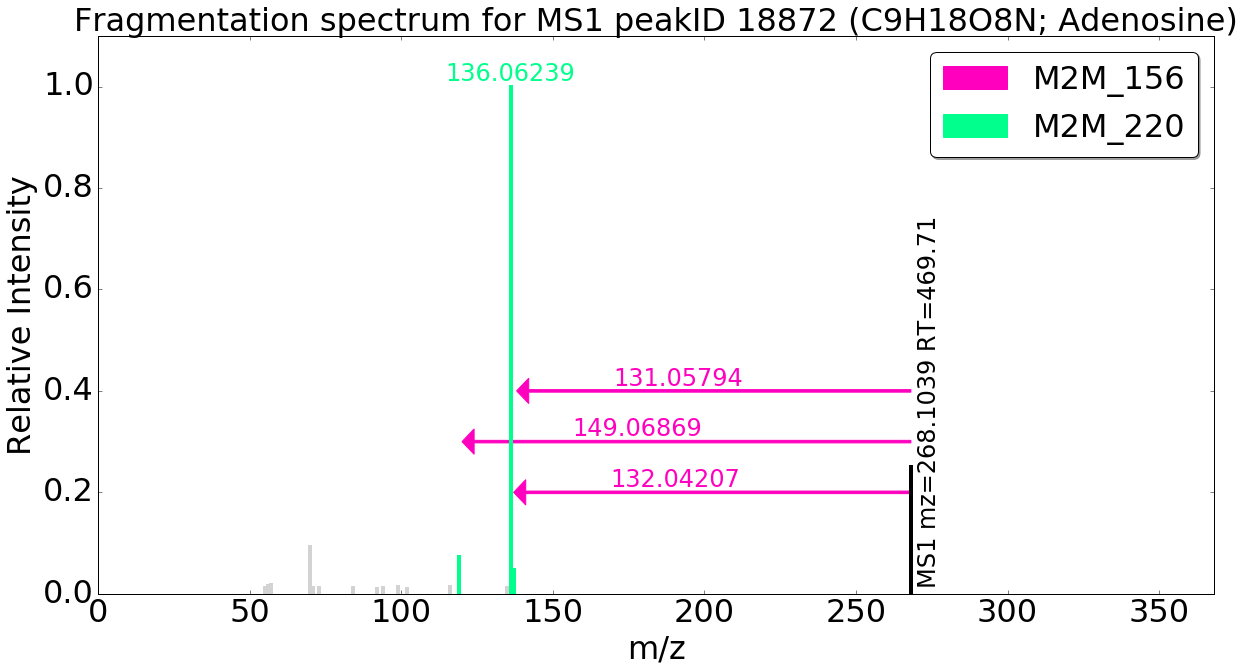

 - M2M_260	:  "Water loss - indicative of a free hydroxyl group"
		  loss_18.00923 (0.942),fragment_176.09136 (0.015),



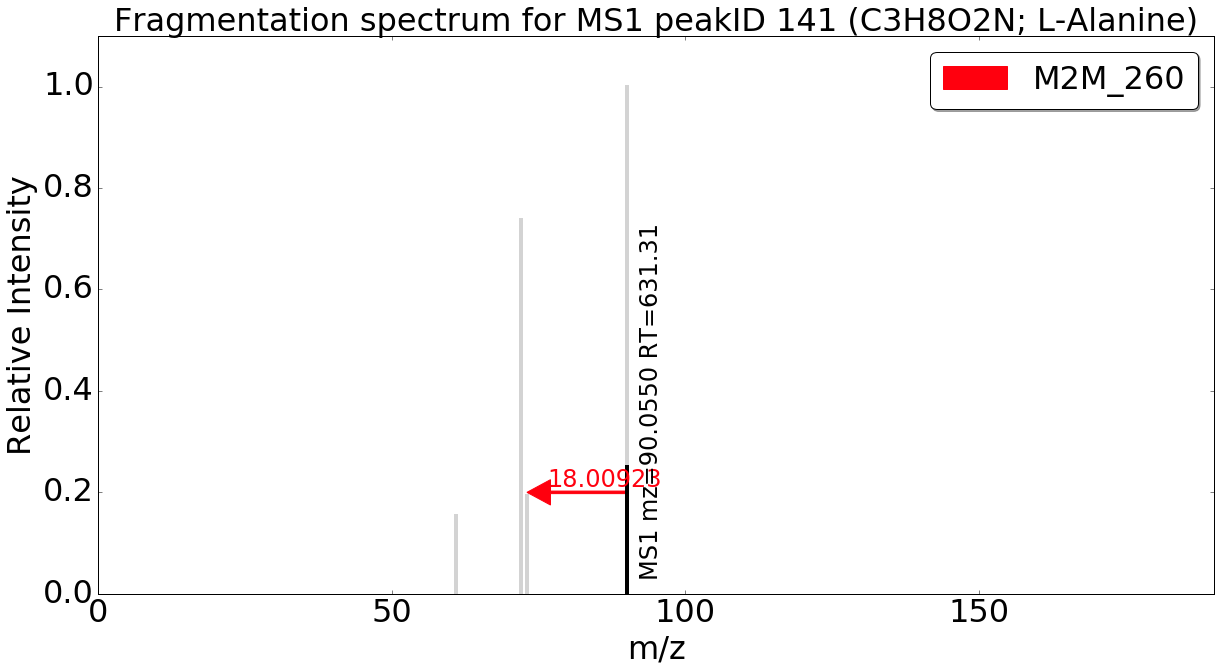

 - M2M_130	:  "Cytosine and a loss of conjugated deoxyribose substructure"
		  fragment_112.05105 (0.273),fragment_113.05456 (0.130),fragment_95.02389 (0.063),loss_133.04527 (0.037),fragment_96.02703 (0.035),fragment_113.04771 (0.026),fragment_125.03493 (0.019),fragment_69.04506 (0.016),fragment_100.03925 (0.015),fragment_191.04568 (0.015),fragment_209.05505 (0.014),loss_43.00571 (0.011),fragment_155.04439 (0.010),
 - M2M_156	:  "[Pentose-H2O] loss
		  loss_132.04207 (0.683),loss_160.03691 (0.038),loss_149.06869 (0.037),fragment_102.06629 (0.030),loss_131.05794 (0.018),fragment_74.07118 (0.011),



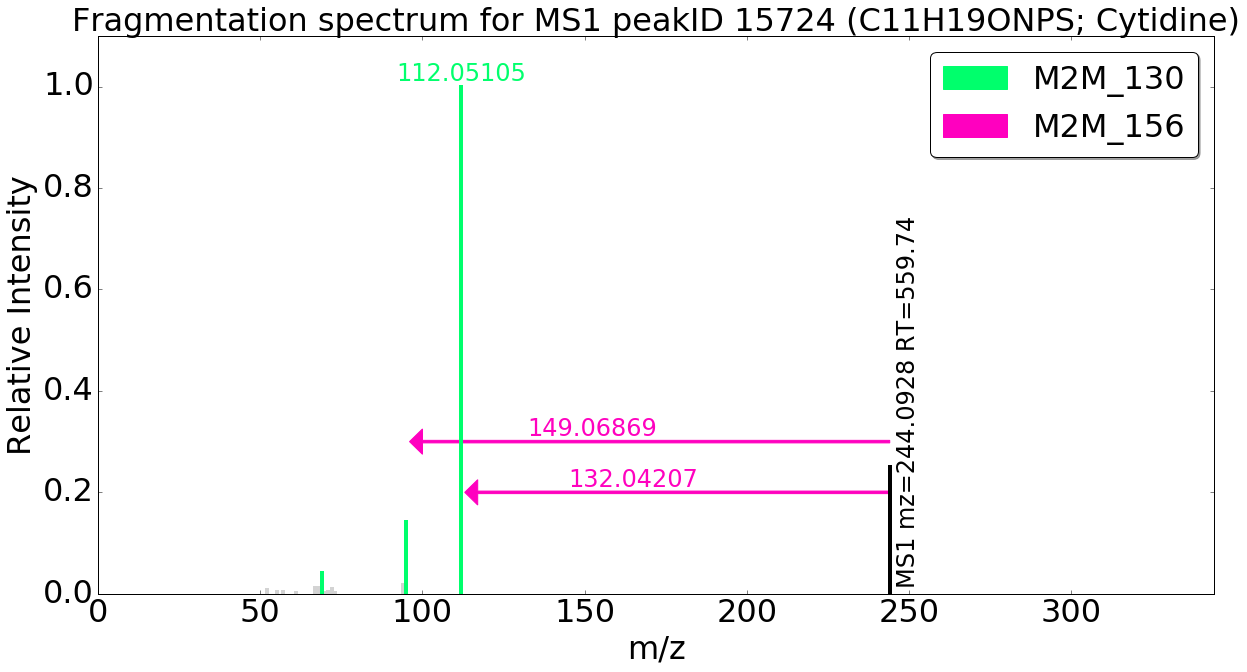

 - No M2M for this MS1 peak at the specified thresholding levels

 - M2M_214	:  "Amine loss - suggests free NH2 group in fragmented molecule"
		  loss_17.02527 (0.883),fragment_366.10831 (0.021),
 - M2M_260	:  "Water loss - indicative of a free hydroxyl group"
		  loss_18.00923 (0.942),fragment_176.09136 (0.015),
 - M2M_69	:  "Possibly suggests 2-OH-4-oxo-pentanoic acid substructure"
		  fragment_69.03368 (0.633),fragment_57.0337 (0.190),fragment_99.04377 (0.025),fragment_55.01824 (0.024),fragment_53.03888 (0.019),fragment_53.00259 (0.019),fragment_99.04454 (0.011),
 - M2M_230	:  "N/O-acetylation loss"
		  fragment_87.04391 (0.782),fragment_187.88232 (0.031),fragment_210.89943 (0.017),



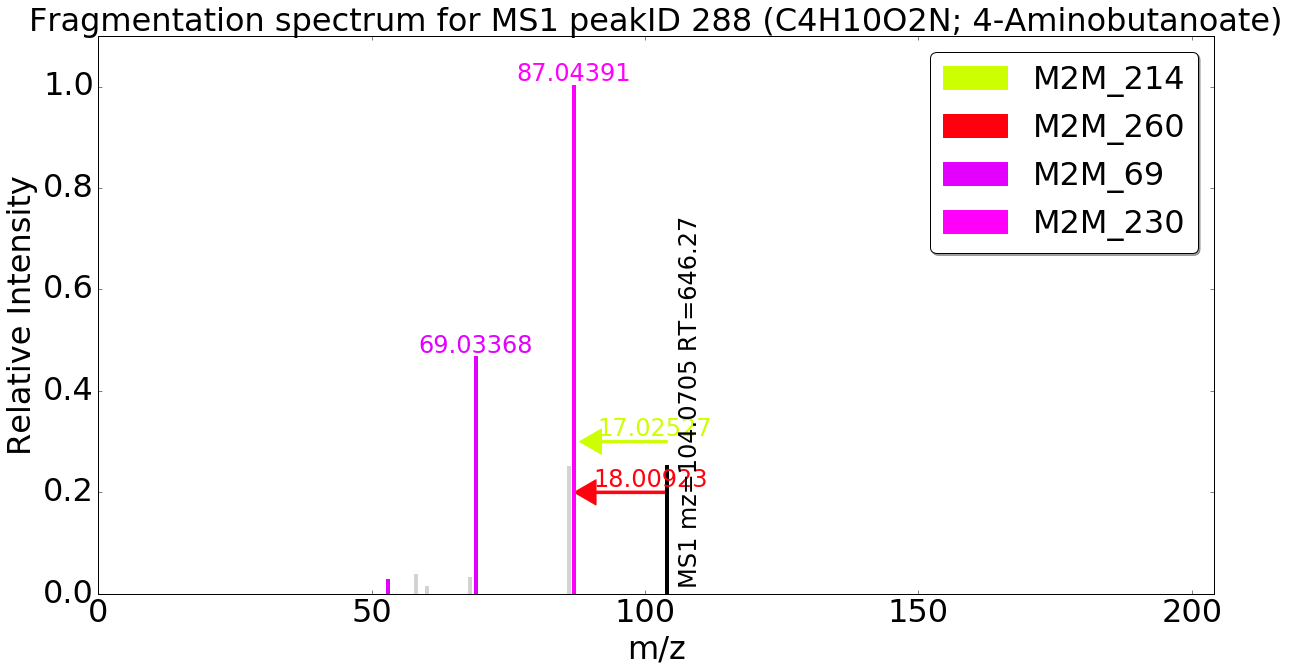

 - M2M_241	:  "Histidine substructure"
		  fragment_110.07176 (0.384),fragment_83.06041 (0.112),fragment_93.04509 (0.070),fragment_156.07684 (0.049),loss_167.08599 (0.045),loss_191.06155 (0.035),fragment_363.17581 (0.023),fragment_56.04977 (0.023),loss_27.01101 (0.023),fragment_143.11757 (0.017),fragment_81.04501 (0.017),fragment_95.06076 (0.012),
 - M2M_262	:  "Combined loss of H2O and CO
		  loss_46.00539 (0.854),loss_74.0003 (0.058),loss_47.0087 (0.017),fragment_100.11239 (0.016),



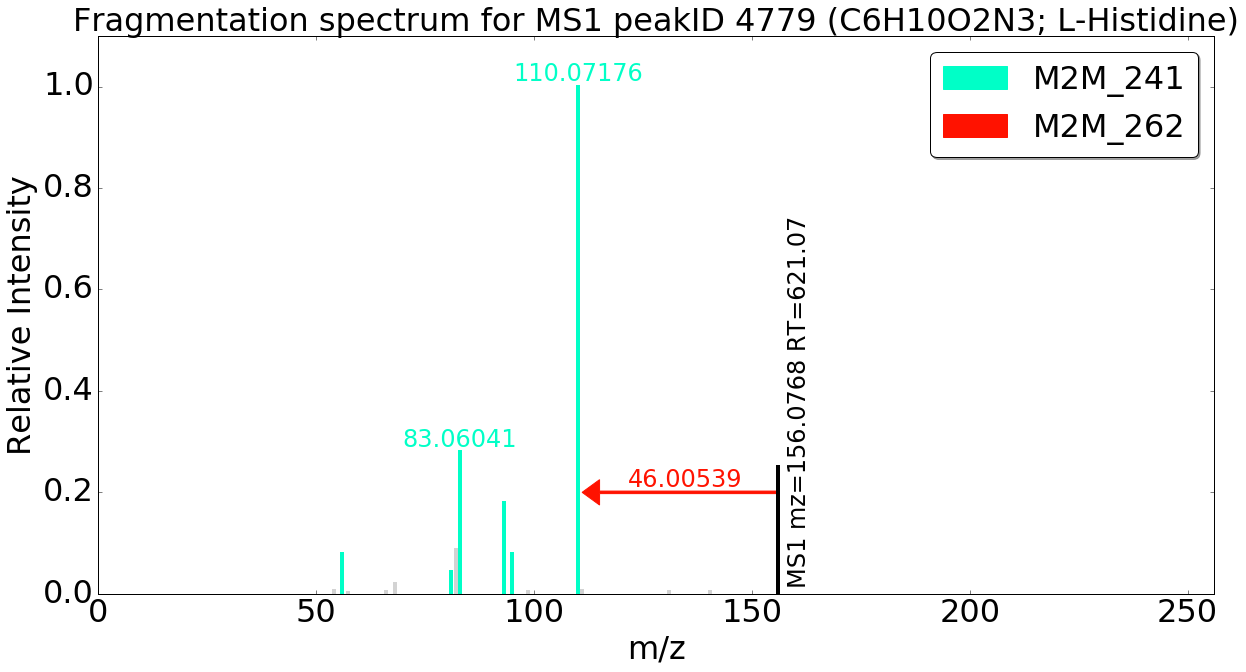

 - M2M_2	:  "Small nitrogen containing fragment ion - often proline or ornithine derived"
		  fragment_70.06514 (0.979),
 - M2M_262	:  "Combined loss of H2O and CO
		  loss_46.00539 (0.854),loss_74.0003 (0.058),loss_47.0087 (0.017),fragment_100.11239 (0.016),



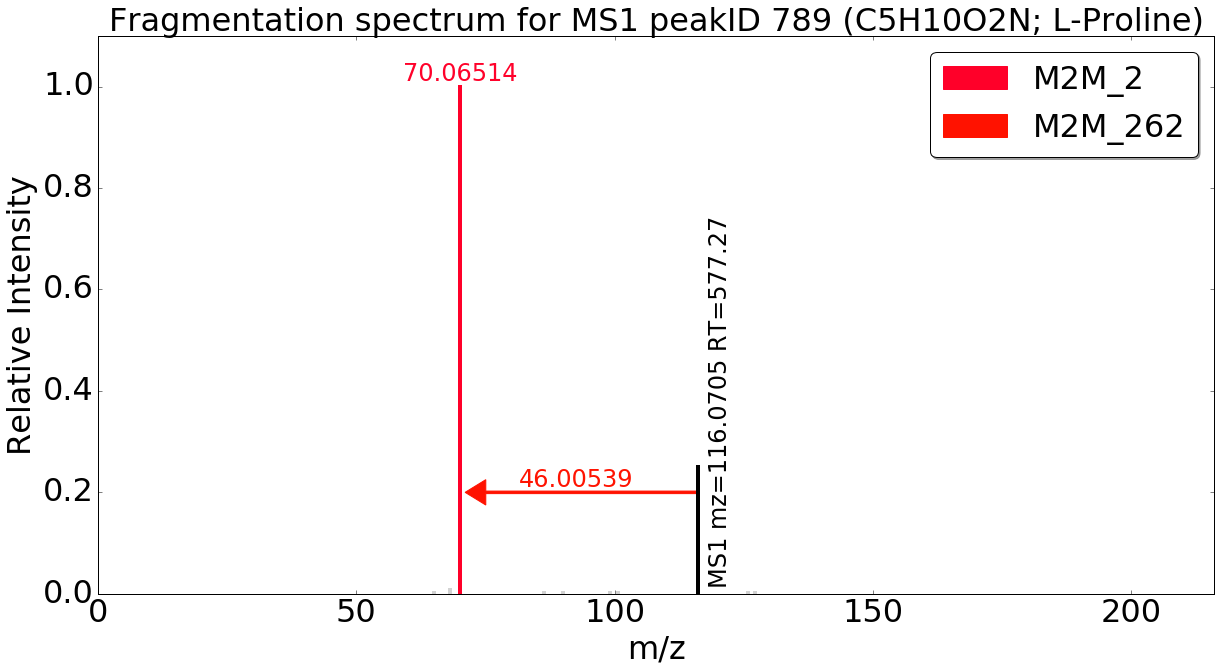

 - M2M_220	:  "Adenine substructure"
		  fragment_136.06239 (0.688),loss_162.03528 (0.049),fragment_119.03518 (0.039),loss_153.04184 (0.027),fragment_137.04626 (0.020),



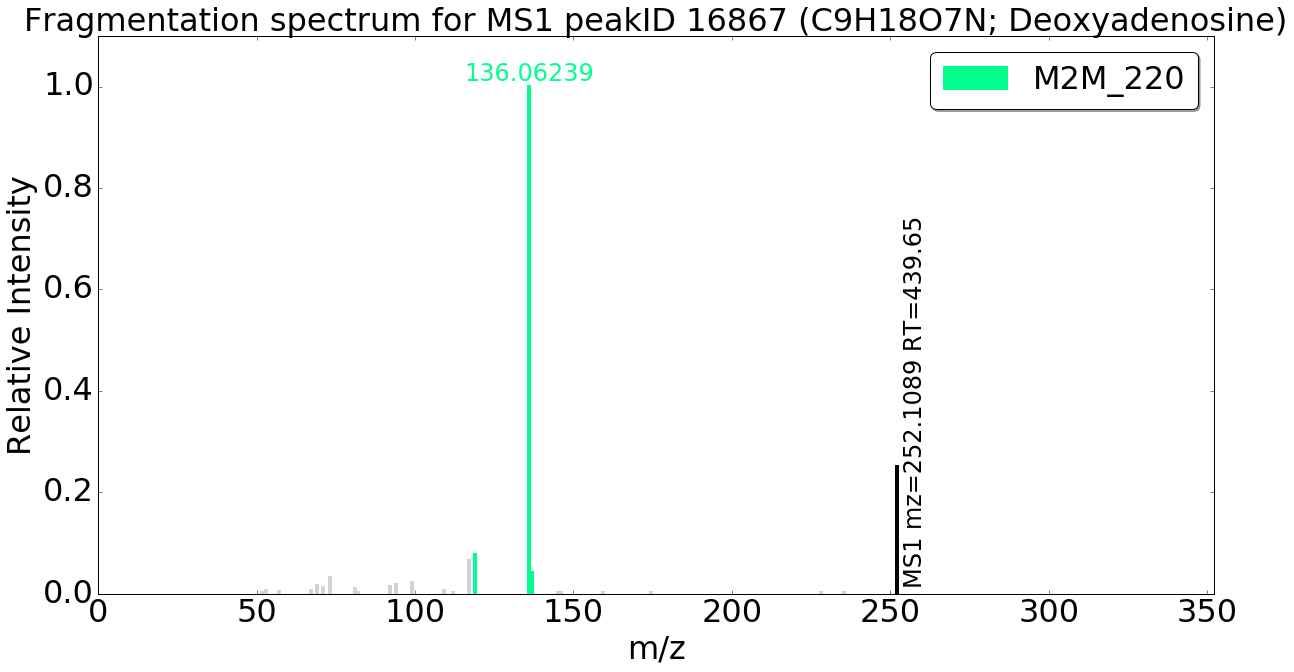

 - M2M_2	:  "Small nitrogen containing fragment ion - often proline or ornithine derived"
		  fragment_70.06514 (0.979),
 - M2M_214	:  "Amine loss - suggests free NH2 group in fragmented molecule"
		  loss_17.02527 (0.883),fragment_366.10831 (0.021),



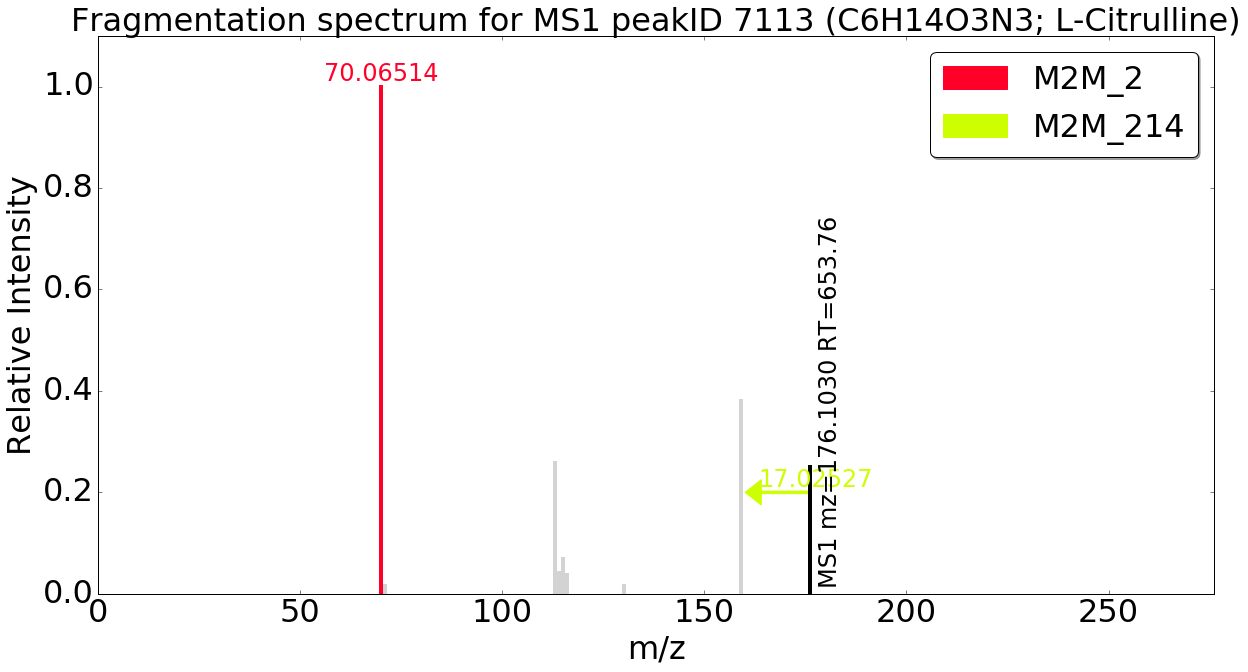

 - M2M_220	:  "Adenine substructure"
		  fragment_136.06239 (0.688),loss_162.03528 (0.049),fragment_119.03518 (0.039),loss_153.04184 (0.027),fragment_137.04626 (0.020),



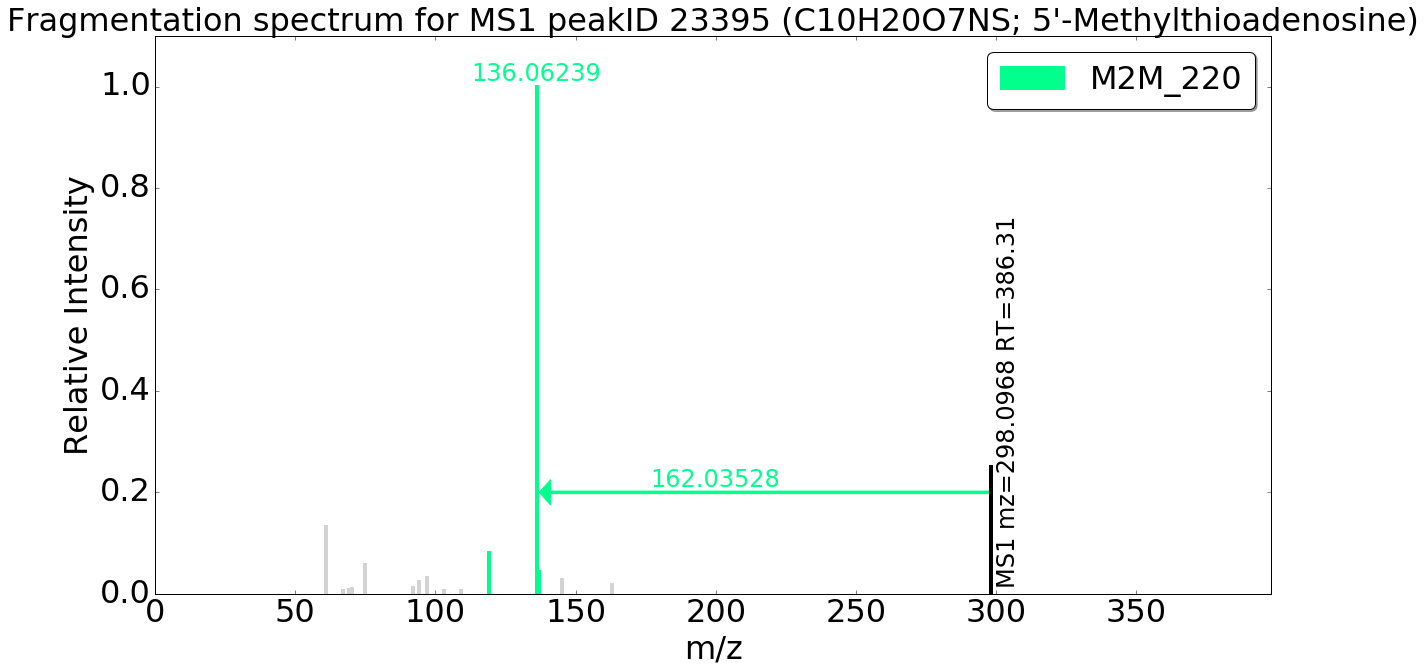

 - M2M_280	:  "Loss possibly indicative of carboxylic acid group with 1-carbon attached"
		  loss_60.02094 (0.741),loss_106.02643 (0.053),fragment_158.11806 (0.052),
 - M2M_184	:  "Trimethylated amine connected to a carboxylic acid group substructure (e.g. betaine)"
		  fragment_58.06552 (0.377),fragment_119.08937 (0.158),fragment_59.07323 (0.093),fragment_120.09034 (0.067),fragment_59.06877 (0.035),fragment_173.04168 (0.034),fragment_60.07657 (0.024),loss_59.01322 (0.021),fragment_76.07561 (0.011),
 - M2M_79	:  "Trimethylated amine connected to a carboxylic acid group substructure (e.g. betaine)"
		  fragment_118.08614 (0.371),loss_117.07884 (0.309),fragment_132.113 (0.034),loss_130.12154 (0.033),fragment_58.06552 (0.029),fragment_59.07323 (0.023),loss_177.09988 (0.010),



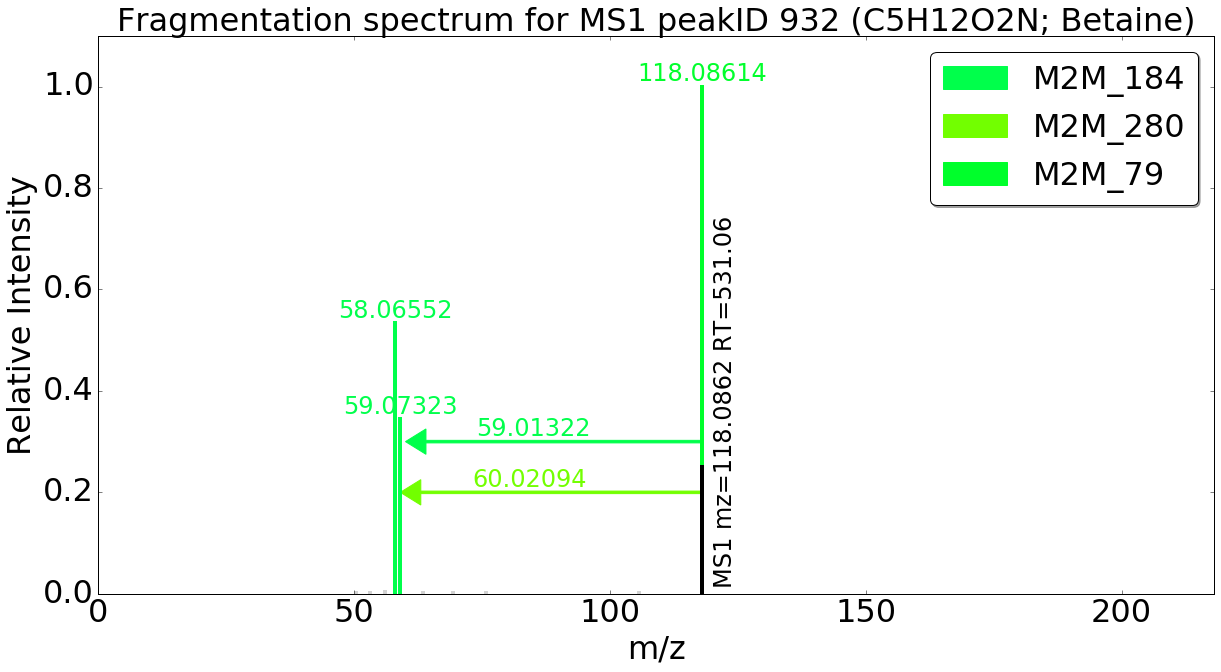

 - M2M_130	:  "Cytosine and a loss of conjugated deoxyribose substructure"
		  fragment_112.05105 (0.273),fragment_113.05456 (0.130),fragment_95.02389 (0.063),loss_133.04527 (0.037),fragment_96.02703 (0.035),fragment_113.04771 (0.026),fragment_125.03493 (0.019),fragment_69.04506 (0.016),fragment_100.03925 (0.015),fragment_191.04568 (0.015),fragment_209.05505 (0.014),loss_43.00571 (0.011),fragment_155.04439 (0.010),
 - M2M_214	:  "Amine loss - suggests free NH2 group in fragmented molecule"
		  loss_17.02527 (0.883),fragment_366.10831 (0.021),



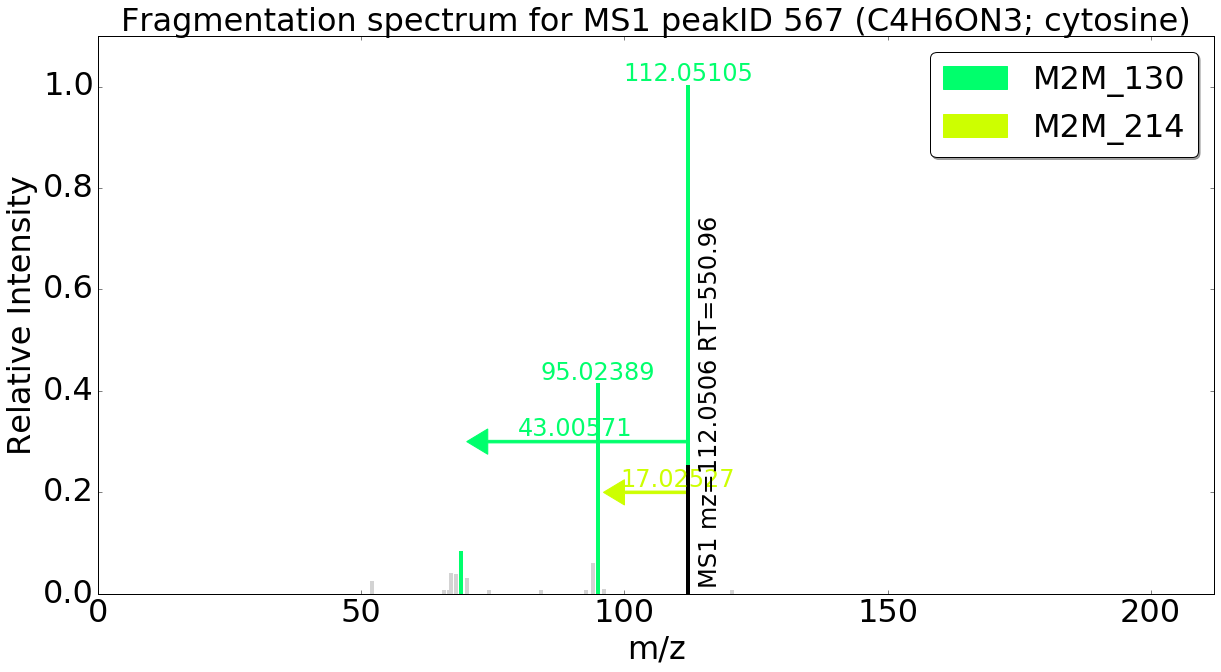

 - No M2M for this MS1 peak at the specified thresholding levels

 - M2M_69	:  "Possibly suggests 2-OH-4-oxo-pentanoic acid substructure"
		  fragment_69.03368 (0.633),fragment_57.0337 (0.190),fragment_99.04377 (0.025),fragment_55.01824 (0.024),fragment_53.03888 (0.019),fragment_53.00259 (0.019),fragment_99.04454 (0.011),



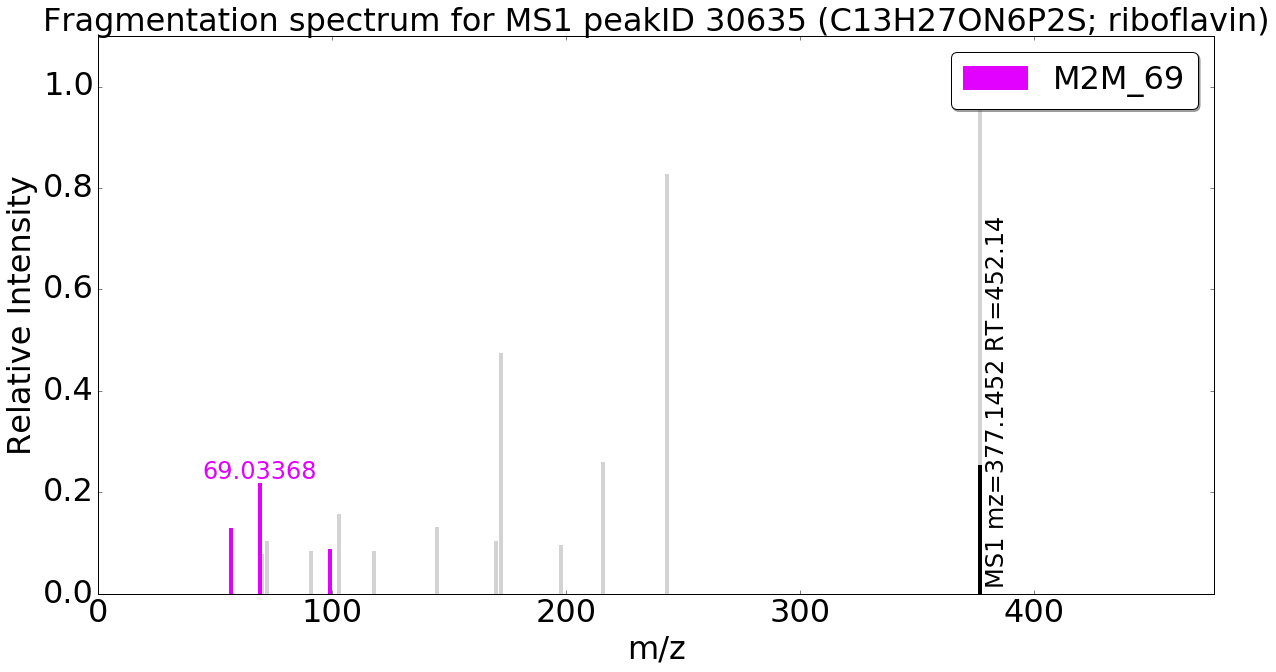

 - M2M_214	:  "Amine loss - suggests free NH2 group in fragmented molecule"
		  loss_17.02527 (0.883),fragment_366.10831 (0.021),



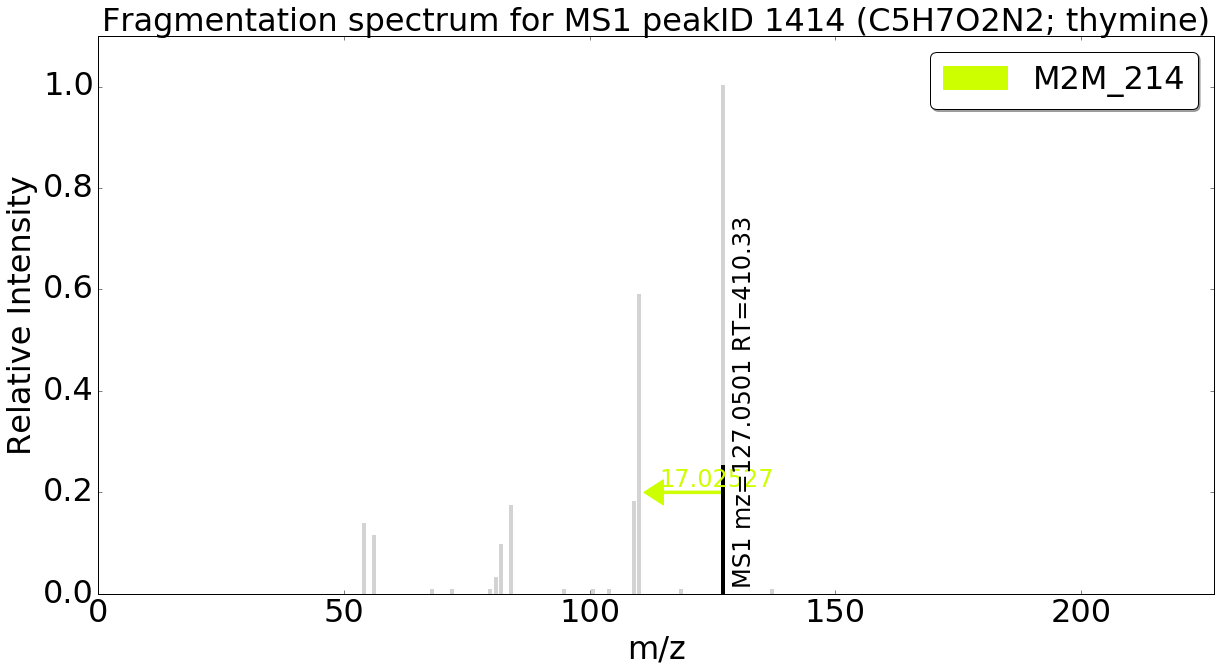

 - M2M_42	:  "Asparagine substructure"
		  fragment_74.02353 (0.251),fragment_88.03919 (0.220),fragment_87.05542 (0.078),fragment_133.06148 (0.077),fragment_70.02895 (0.038),fragment_158.04483 (0.034),fragment_60.04477 (0.020),fragment_116.0344 (0.019),loss_101.04757 (0.016),fragment_175.12257 (0.015),loss_188.07979 (0.012),fragment_88.0218 (0.010),
 - M2M_211	:  "N-acetylputrescine substructure"
		  loss_59.037 (0.567),fragment_114.09123 (0.097),loss_101.04757 (0.042),loss_59.00065 (0.030),fragment_131.11777 (0.029),fragment_425.1355 (0.029),fragment_72.04466 (0.023),fragment_60.04477 (0.014),
 - M2M_262	:  "Combined loss of H2O and CO
		  loss_46.00539 (0.854),loss_74.0003 (0.058),loss_47.0087 (0.017),fragment_100.11239 (0.016),



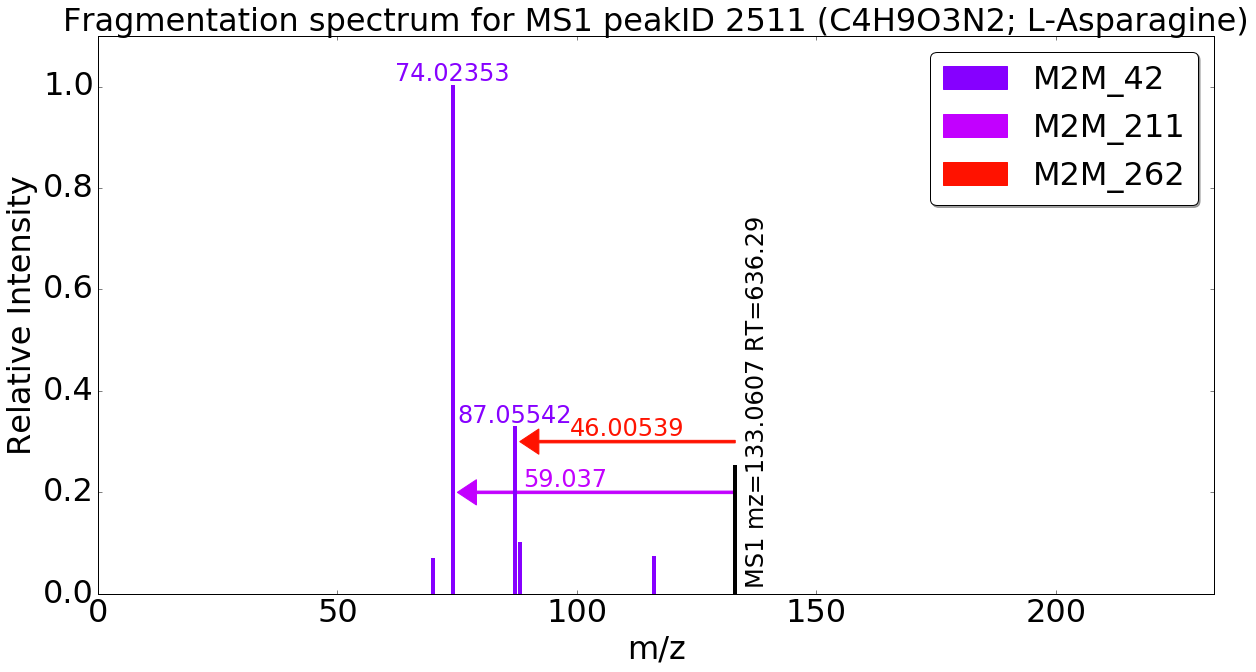

 - M2M_260	:  "Water loss - indicative of a free hydroxyl group"
		  loss_18.00923 (0.942),fragment_176.09136 (0.015),
 - M2M_262	:  "Combined loss of H2O and CO
		  loss_46.00539 (0.854),loss_74.0003 (0.058),loss_47.0087 (0.017),fragment_100.11239 (0.016),



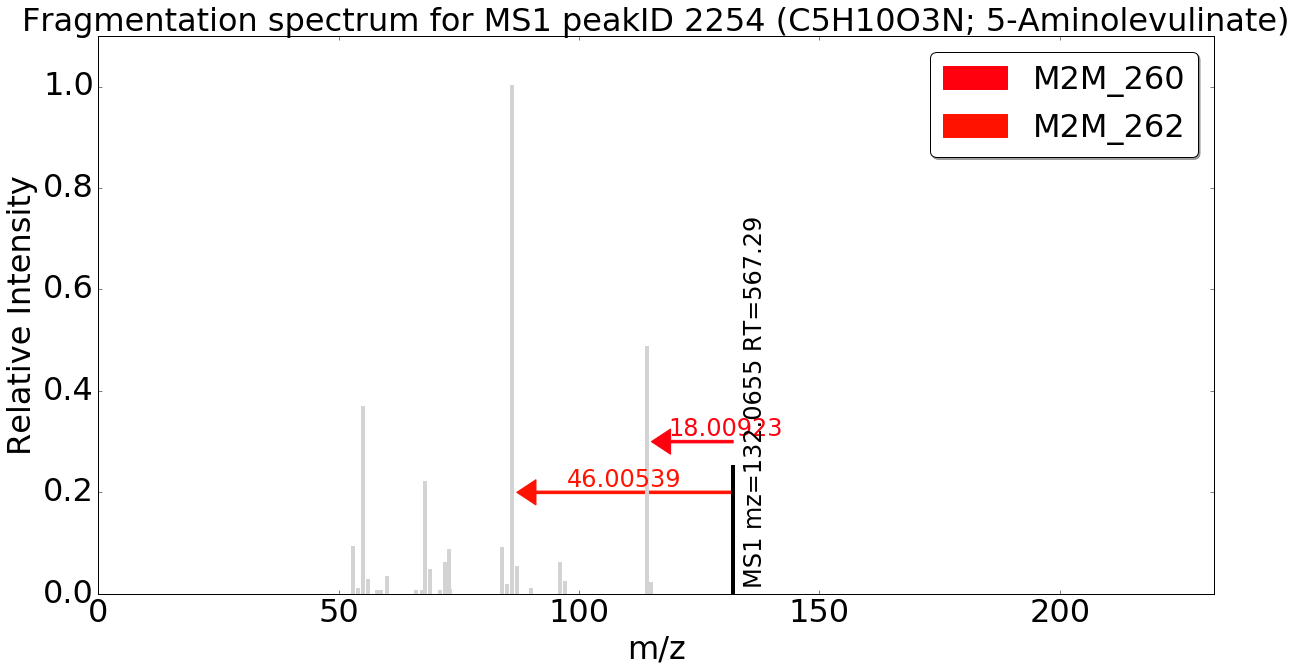

 - M2M_220	:  "Adenine substructure"
		  fragment_136.06239 (0.688),loss_162.03528 (0.049),fragment_119.03518 (0.039),loss_153.04184 (0.027),fragment_137.04626 (0.020),
 - M2M_214	:  "Amine loss - suggests free NH2 group in fragmented molecule"
		  loss_17.02527 (0.883),fragment_366.10831 (0.021),



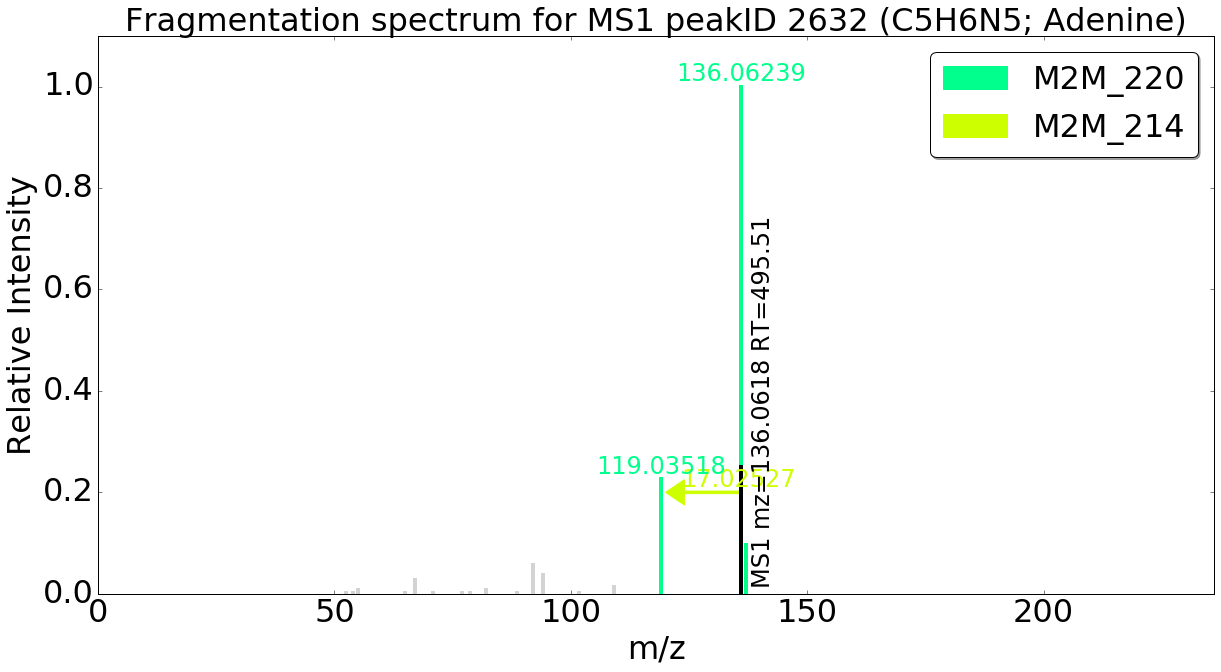

 - No M2M for this MS1 peak at the specified thresholding levels

 - No M2M for this MS1 peak at the specified thresholding levels

 - M2M_214	:  "Amine loss - suggests free NH2 group in fragmented molecule"
		  loss_17.02527 (0.883),fragment_366.10831 (0.021),
 - M2M_262	:  "Combined loss of H2O and CO
		  loss_46.00539 (0.854),loss_74.0003 (0.058),loss_47.0087 (0.017),fragment_100.11239 (0.016),



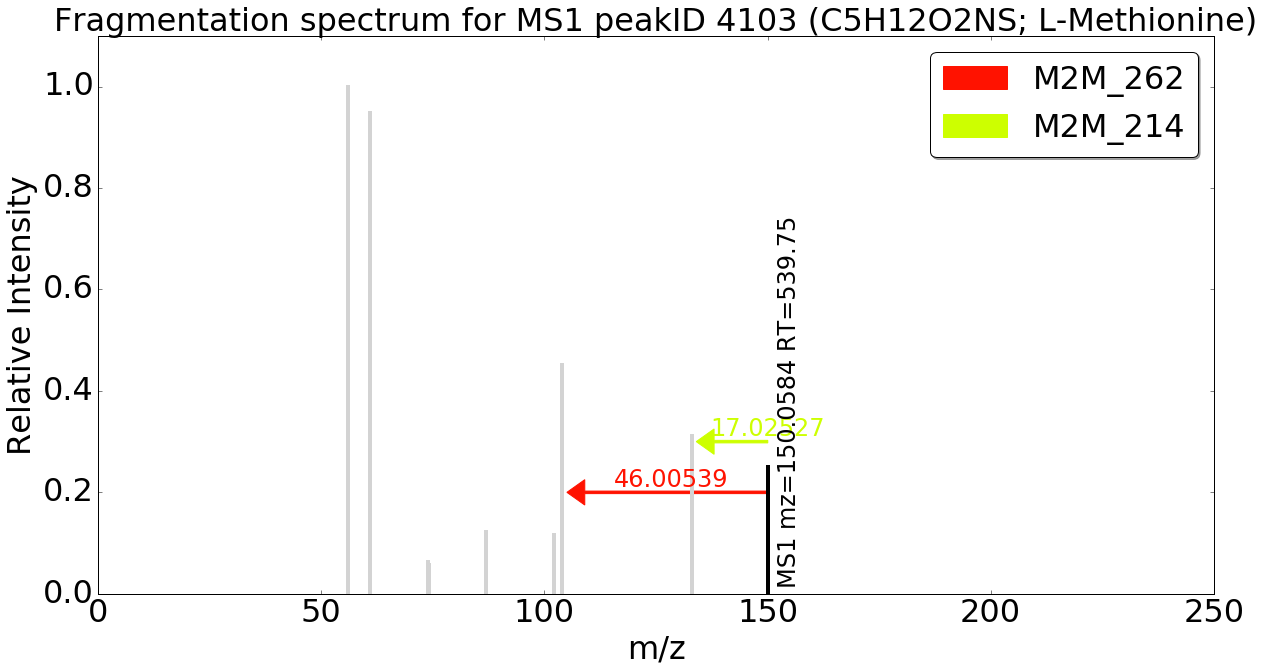

 - M2M_243	:  "Conjugation of a phosphate group (H4O4P) substructure"
		  fragment_98.98385 (0.736),loss_56.02612 (0.030),fragment_127.01561 (0.019),fragment_173.02023 (0.018),fragment_261.03653 (0.011),
 - M2M_158	:  "Leucine substructure"
		  fragment_86.09652 (0.794),fragment_132.10154 (0.048),fragment_219.90121 (0.031),fragment_293.3515 (0.031),fragment_189.12428 (0.012),



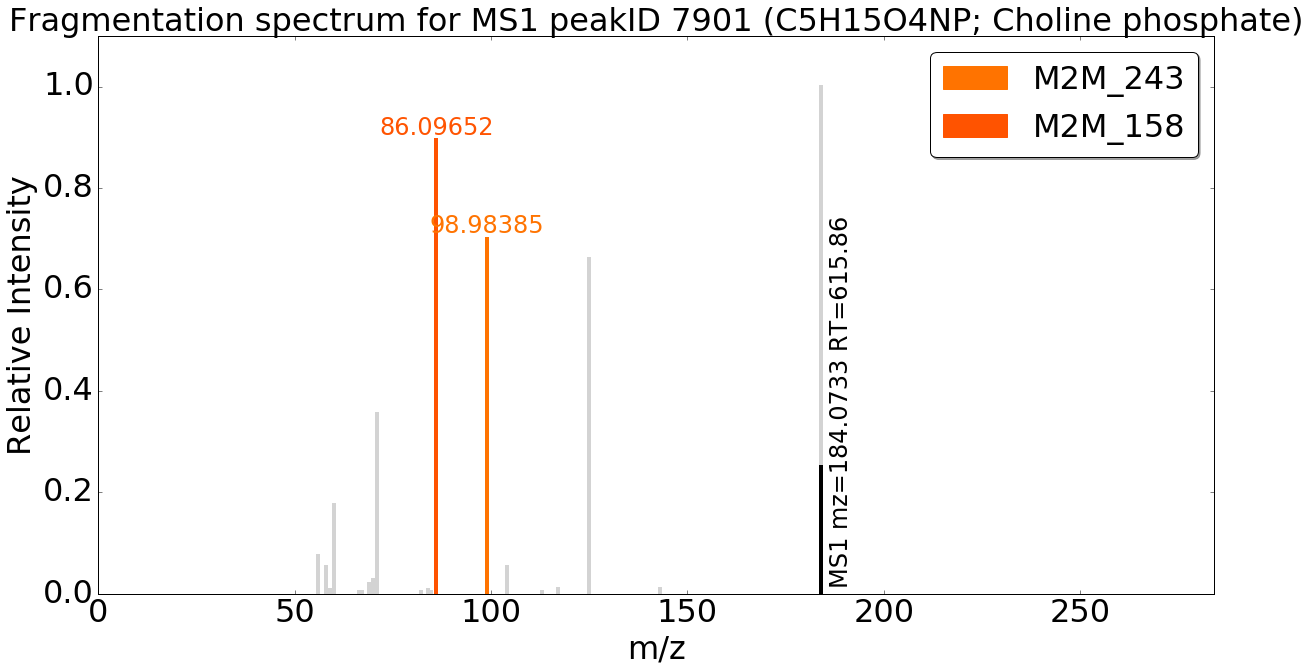

In [20]:
m2m_list = motifs_of_interest
word_map, motif_words = ms2lda.print_motif_features(quiet=True)
for i in range(len(ms1_list)):
    
    ms1 = ms1_list[i]
    df = print_report(ms2lda, G, ms1, motif_annotation, motif_words, motif_colour, motif_idx, word_map, 
                      ms1_label=ms1_label, xlim_upper=300)
#     display(df) # show the table to see the mz, annotations, etc